<font size="5"> Risk & Uncertainty Assessment of a region facing tropical cyclones</font><br>
<font size="5"> **CLIMADA EXERCISE 1** to the lecture<br>
<font size="4"> Climate Change Uncertainty and Risk: from Probabilistic Forecasts to Economics of Climate Adaptation</font>

**Prof. Reto Knutti and Prof. David Bresch** <br>
Spring Term 2024<br>
<br>
**Tutors**<br>
Donghe Zhu (donghe.zhu@env.ethz.ch)<br>
Gergana Gyuleva (gergana.gyuleva@env.ethz.ch)<br>
Timo Schmid (timo.schmid@usys.ethz.ch)<br>
Sarah Hülsen (sarah.huelsen@usys.ethz.ch)<br>

All relevant course information to be found here:<br>
http://www.iac.ethz.ch/edu/courses/master/modules/climate-risk.html<br>
Everything for CLIMADA (tutorials, code) can be downloaded from GitHub:<br>
https://github.com/CLIMADA-project/climada_python

<font size="5"> **Introduction: Understand the probabilistic natural catastrophe impact model CLIMADA** </font>

The goal of this exercise is to get acquainted with the probabilistic natural catastrophe impact model CLIMADA. A set of exercises will walk you through the single steps of a standard impact calculation. This process includes using the CLIMADA tropical cylone model to calculate windfields, load exposure data, apply impact functions, and calculate impacts. You will use this framework to explore and discuss a set of questions around how to derive economics of climate change adaptation, how to think about uncertainty, and how to implement climate change. We encourage you to experiment and explore. Once you have worked your way through these exercises you should be able to apply CLIMADA to your own project, which you may present at the end of this course. <br>

**The functionality of CLIMADA is gathered in the following classes:**
- **Entity**: socio-economic models:
   - Exposures: exposed values
      - BlackMarble: regional economic model from nightlight intensities and economic indicators (GDP, income group)
      - LitPop: regional economic model using nightlight and population maps together with several economic indicators
   - ImpactFuncSet: collection of impact functions per hazard
      - ImpactFunc: one adjustable impact function
      - IFTropCyclone: definition of impact functions for tropical cyclones
   - DiscRates: discount rates per year
   - MeasureSet: collection of measures for adaptation
      - Measure: one configurable measure
- **Hazard**: meteorological models:
   - TropCyclone: tropical cyclone events
- **Impact**: impacts of the Hazard and Entity interaction.
- **CostBenefit**: adaptation options appraisal.
- **Add-ons**: OpenStreetMap and Google Earth Engine routines.

Classes provide a means of bundling data and functionality together.

**Outline exercises**
1. Hazard creation (calculation vs. retrieval from data API)
2. Exposure creation, vulnerability, impact calculation, dealing with uncertainty, effect of insurance
3. Climate change scenarios, economic growth and total climate risk, adaptation measures

**Expected deliverables:**<br>
* A Jupyter Notebook file for all your code. Use markdown blocks to specify the question and code blocks to calculate and plot the answers. Please provide the excel files as well.
* A pdf-dump of the calculated Jupyter Notebook.<br>

**Cautionary remarks and further notes:**<br>
* The execution of some cells is computationally demanding and takes some time. We indicate these cells with a small note. Particularly, the generation of the hazard event set takes **> 10 minutes**.
* Some commands generate (a long set of) **WARNINGS**. These are not **ERRORS** and thus of no further concern beyond a little bit of annoying output.
* For some questions or tasks we ask you to inspect classes or functions. For those who are less familiar with the object-oriented style of programming in Python, the following hint might prove useful: You can always use `help(function or class`) to print out information of the class or functions you'd like to inspect. 

<font size="5"> **1. Generate hazard event set** </font>

In this part we will learn how to generate event sets that describe the intensity of tropical cyclones (South Indian Ocean). In CLIMADA the class `hazard` and, more specifically, the derived class `TropCyclone` are defined to hold all information of this natural forcing. We will explore two options:<br> 
* **OPTION A**: First, we will "manually" create a hazard event set from the tracks of tropical cyclones which are organised in the class `TCTracks`. Additional information can be found in this step-by-step [tutorial](https://climada-python.readthedocs.io/en/latest/tutorial/climada_hazard_TropCyclone.html).
*  **OPTION B**: Second, we will fetch existing hazard event sets through the CLIMADA API. 

We will re-use some of the generated hazard event sets in subsequent exercises. We suggest to store them in a folder named `data` on your IAC Hub. Use the following code to define the path to this folder:

In [1]:
from pathlib import Path
data_dir = Path('IAC_lectures/2024_FS/CCUR/Groupwork/2_CLIMADA/data')

<font size="5"> **OPTION A: Create hazard event sets from tropical cyclone tracks**</font>

<font size="4"> **Load all needed modules** </font>

Use the following code to load all modules needed to generate the hazard event set, you can load more modules if you need them:

In [2]:
from climada.hazard import TCTracks, Centroids, TropCyclone
import numpy as np

<font size="4">**Read the storm track data** </font>

We will use the storm track data of the International Best Track Archive for Climate Stewardship (IBTrACS). If you have not yet downloaded the IBTrACS database, CLIMADA will try to do it for you automatically. If downloading it automatically does not work, CLIMADA will ask you to download the file yourself. 

We start by looking at one exemplary storm to get a better understanding of the IBTrACS data. The first line of the following code loads the storm named Geralda with storm ID '1994026S11078' from the IBTrACS database. The second line generates a standard plot for this particular storm. Look at the plot, check if it is reasonable, and examine `tr_geralda.data`.<br>

2024-06-21 07:28:13,564 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/yitali/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


<GeoAxesSubplot:>

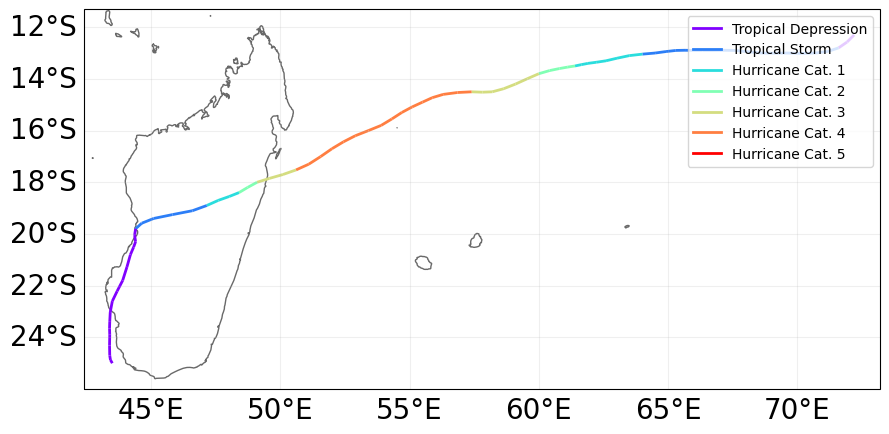

In [3]:
tr_geralda = TCTracks.from_ibtracs_netcdf(storm_id='1994026S11078')
tr_geralda.plot()

In [4]:
tr_geralda.data

[<xarray.Dataset>
 Dimensions:                 (time: 81)
 Coordinates:
   * time                    (time) datetime64[ns] 1994-01-26T18:00:00 ... 199...
     lat                     (time) float32 -12.3 -12.58 -12.8 ... -24.87 -25.0
     lon                     (time) float32 72.2 71.93 71.6 ... 43.4 43.43 43.5
 Data variables:
     time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
     radius_max_wind         (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     radius_oci              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     max_sustained_wind      (time) float32 28.41 30.68 34.09 ... 28.41 28.41
     central_pressure        (time) float32 1e+03 997.0 995.0 ... 991.0 990.0
     environmental_pressure  (time) float64 1.005e+03 1.005e+03 ... 1.005e+03
     basin                   (time) <U2 'SI' 'SI' 'SI' 'SI' ... 'SI' 'SI' 'SI'
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     name:                     GERA

Now read all tracks since 1990 for the Southern Indian Ocean (SI) with the following code (this might take some minutes):

2024-06-21 07:28:20,057 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/yitali/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2024-06-21 07:29:37,670 - climada.hazard.tc_tracks - WARNING - 26 storm events are discarded because no valid wind/pressure values have been found: 1990262S07074, 1990288S08074, 1991253S09080, 1992044S14128, 1993025S12136, ...


<GeoAxesSubplot:>

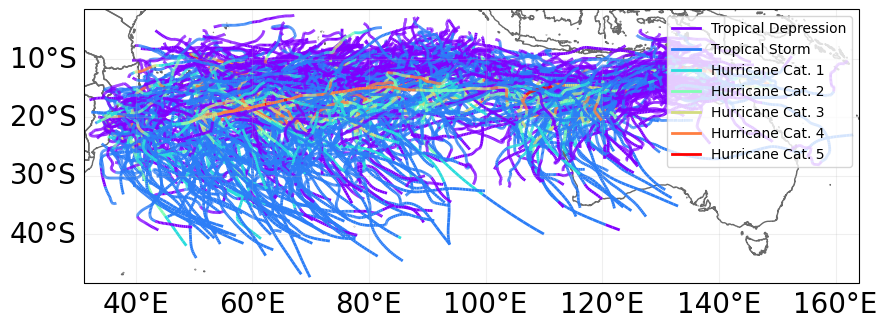

In [5]:
tracks_SI = TCTracks.from_ibtracs_netcdf(year_range=(1990, 2023), basin='SI')
tracks_SI.equal_timestep(time_step_h=1)
tracks_SI.plot()

<font size="4"> **Generate a probabilistic set**</font>

To account for uncertainty within the storm set, we add a number of perturbed storm tracks to those already stored in `tracks_SI`. We use a random walk procedure to generate a number of additional storms originating from the observed tracks. Note, that prior to generating probabilistic storms, we need to interpolate the data between the recorded time points and generate smooth tracks (first line of the following code). The following code allows generating probabilistic storms from our exemplary storm Geralda:

<GeoAxesSubplot:>

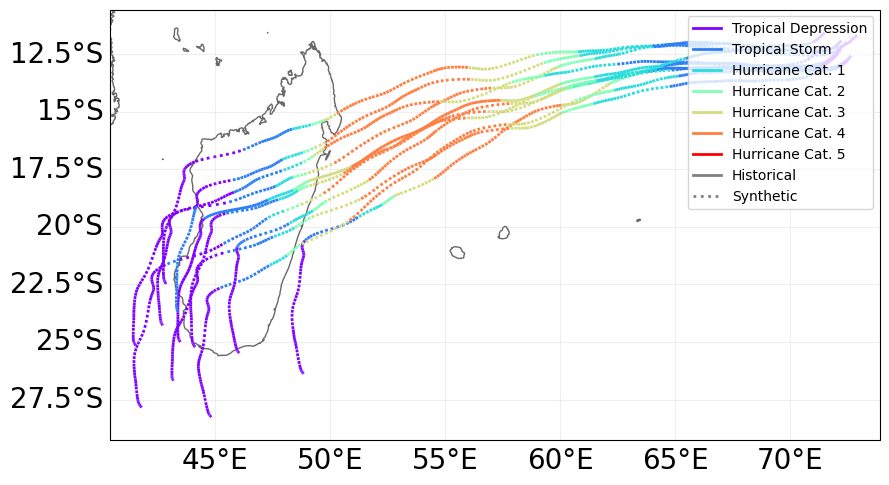

In [6]:
tr_geralda.equal_timestep(time_step_h=1)
tr_geralda.calc_perturbed_trajectories(nb_synth_tracks=10, max_shift_ini=0.75, max_dspeed_rel=0.3)
tr_geralda.plot()

The variable `nb_synth_tracks` deﬁnes the number of probabilistic storms computed for each original storm loaded from the data. Additionally, we can specify further parameters (e.g. `max_shift_ini`, `max_dspeed_rel`) which are used by the random walk methodology.

Learn more about the CLIMADA module named `tc_tracks_synth` which contains the function `calc_perturbed_trajectories` with the following command:

In [7]:
from climada.hazard import tc_tracks_synth
help(tc_tracks_synth)

Help on module climada.hazard.tc_tracks_synth in climada.hazard:

NAME
    climada.hazard.tc_tracks_synth - This file is part of CLIMADA.

DESCRIPTION
    Copyright (C) 2017 ETH Zurich, CLIMADA contributors listed in AUTHORS.
    
    CLIMADA is free software: you can redistribute it and/or modify it under the
    terms of the GNU General Public License as published by the Free
    Software Foundation, version 3.
    
    CLIMADA is distributed in the hope that it will be useful, but WITHOUT ANY
    WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A
    PARTICULAR PURPOSE.  See the GNU General Public License for more details.
    
    You should have received a copy of the GNU General Public License along
    with CLIMADA. If not, see <https://www.gnu.org/licenses/>.
    
    ---
    
    Generate synthetic tropical cyclone tracks from real ones

FUNCTIONS
    calc_perturbed_trajectories(tracks, nb_synth_tracks=9, max_shift_ini=0.75, max_dspeed_rel=0.3, max

Explore the `calc_perturbed_trajectories` function by running a small sensitivity analysis. Test the sensitivity of the parameter choice on the generated storms by choosing different values for `max_shift_ini` and `max_ddirection`. You can simply alter the values in the argument of the command.

Choose a parameter set which seems reasonable to you and decide on the number of random walks per storm (`nb_synth_tracks`). Generate the track set for all tracks by using the routine `calc_perturbed_trajectories` on `tracks_SI`.

Note, there are some entries in the IBTrACS dataset that only contain one datapoint. We cannot apply the random walk algorithm to these entries and thus filter them out with the following routine before proceeding with the tasks:

In [8]:
filter_only_one_time = [track for track in tracks_SI.data if track.time.size >= 2]
tracks_SI = TCTracks()
tracks_SI.data = filter_only_one_time

Second note, we will compare the probabilistic track set to the original data. Therefore, you first need to deepcopy the `tracks_SI` with the code below: 

In [9]:
import copy as cp
tracks_SI_proba = cp.deepcopy(tracks_SI)
tracks_SI_proba_bis = cp.deepcopy(tracks_SI)

Now, you can apply the `calc_perturbed_trajectories` function to `tracks_SI_proba`.

<GeoAxesSubplot:>

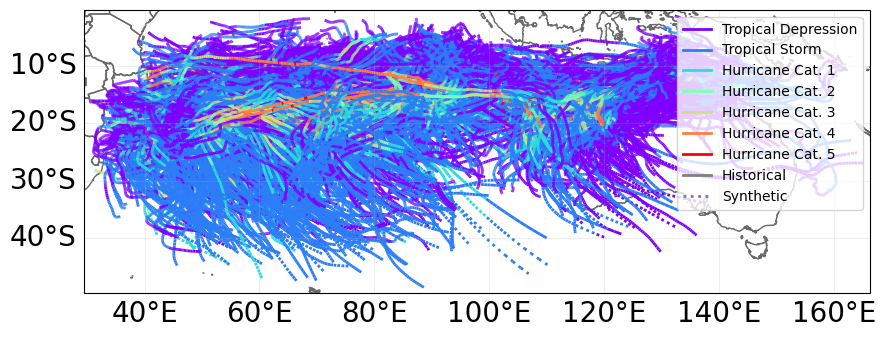

In [10]:
tracks_SI_proba.calc_perturbed_trajectories(nb_synth_tracks=2, max_shift_ini=2, max_dspeed_rel=0.3)
tracks_SI_proba.plot()

<GeoAxesSubplot:>

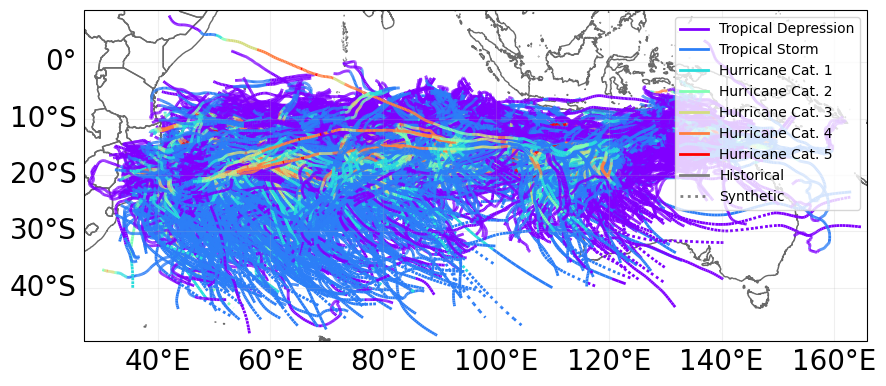

In [11]:
tracks_SI_proba_bis.calc_perturbed_trajectories(nb_synth_tracks=2, max_shift_ini=0.75, max_ddirection=2*3.14/360)
tracks_SI_proba_bis.plot()

**1.a)** What is the effect of `max_shift_ini` and `max_ddirection` on your storm tracks?

max_shift_ini alters the starting point of the initial track. E.g. max_shift_ini = 2 would alter the starting point of each initial track for 2 degrees in longitude and latidue. max_ddirection defines how much the track direction max. varies at each time step. In our second example we chose a variation of up to 2 degrees at each time step. 

**1.b)** Which parameter set `(nb_synth_tracks, max_shift_ini, max_dspeed_rel)` have you chosen and why? <br>
Note: There is no right or wrong answer to this question as long as you provide some rationale that justifies your choices (e.g. through literature values or common sense).

nb_synth_tracks depends on the readability of the data and on the computing power we have. Our historical data set has a lot of observed storm tracks, therefore we chose nb_synth_tracks = 2, which is already a lot to compute but still feasible.

max_shift_ini is about where the storm could have started and a 0.5° change is the distance of 55km (1° is 111km). We believe that this low amount of variation in the starting point of each track is sufficient to account for the gaps in the historically observed data set, especially given that our data set is already quite large. 

max_dspeed_rel is the relative change of translational speed. We decided that keeping it at +- 30% would be adequate to account for variation in the strength of the TC's. 

<font size="4"> **Generate a hazard event set** </font> 

As a ﬁnal step of the hazard generation, we need to compute the 2D windfield of the storms tracks at the locations of interest. These locations are represented by the class `Centroids`. Familiarize yourself with the `TropCyclone` class and the function `set_from_tracks()`. <br>
<br>
This function applies the gradient wind model expressed in equation (4) (combined with equation (6)) from [Holland, G.J. (1980): An Analytic Model of the Wind and Pressure Profiles in Hurricanes.](https://doi.org/10.1175/1520-0493(1980)108<1212:AAMOTW>2.0.CO;2)

More precisely, this function implements the following equation:
\begin{equation}
    V(r) = \sqrt{\left(\frac{B}{\rho}\right) * \left(\frac{r_{max}}{r}\right)^B * (p_{env} - p_{cen}) * e^{-(\frac{r_{max}}{r})^B} + \left(r*\frac{f}{2}\right)^2} + \left(r*\frac{f}{2}\right) 
\end{equation}

In terms of this function's arguments, $B$ is the Holland's b parameter at each track node and $r$ is the distance between centroids and track nodes. The air density $\rho$ is assumed to be constant while the Coriolis parameter $f$ is computed from the latitude using the constant rotation rate of the earth. $r_{max}$ is the radius of maximum winds at each track node, $p_{env}$ is the environmental pressure at each track node, and $p_{cen}$ the central pressure at each track node.

Create the centroids using the following code:

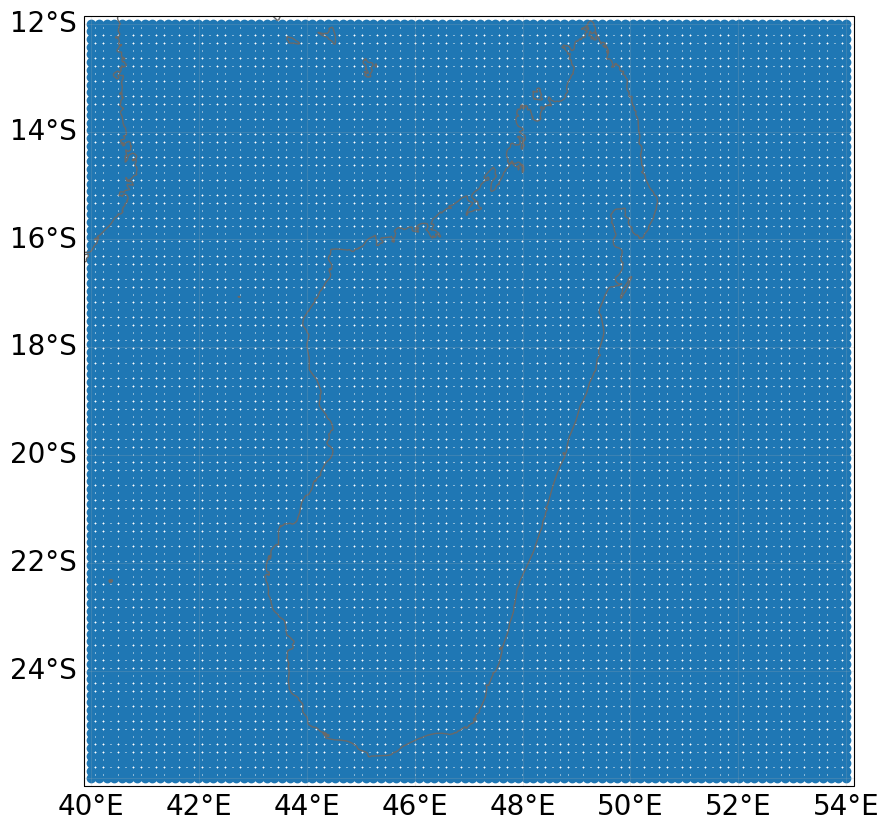

In [12]:
min_lat, max_lat, min_lon, max_lon = -26, -12, 40, 54
resol = 100
grid = (np.mgrid[min_lat : max_lat : complex(0, resol),
min_lon : max_lon : complex(0, resol)]). \
reshape(2, resol*resol).transpose()
cent = Centroids.from_lat_lon(grid[:,0], grid[:,1])
cent.id = np.arange(cent.lat.size)
cent.check()
cent.plot();

**1.c)** What is the horizontal spacing between your centroids? This is going to be the spatial resolution of the hazard event sets.

The horizontal spacing is of 14 degrees from 40E to 54E but split into 100 increment of 0.14 decimal degrees, or 15.6km

Now, create the tropical cyclone hazards using the centroids and your track sets (original/historical and probabilistic).

**Note, this step takes some time (> 10 minutes). Calculating windfields is computationally demanding; especially for the probabilistic track set. Grab a coffee, sit back and relax.**

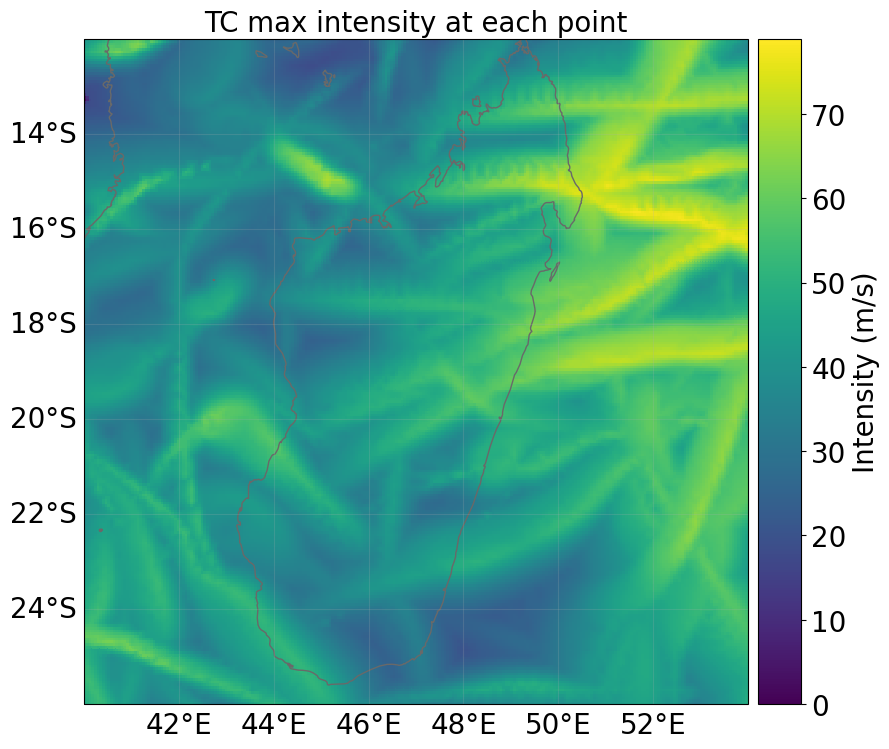

In [13]:
# create a hazard object from the original/historical track set
tc_SI = TropCyclone.from_tracks(tracks_SI, centroids=cent)
tc_SI.check()
tc_SI.plot_intensity(event=0);

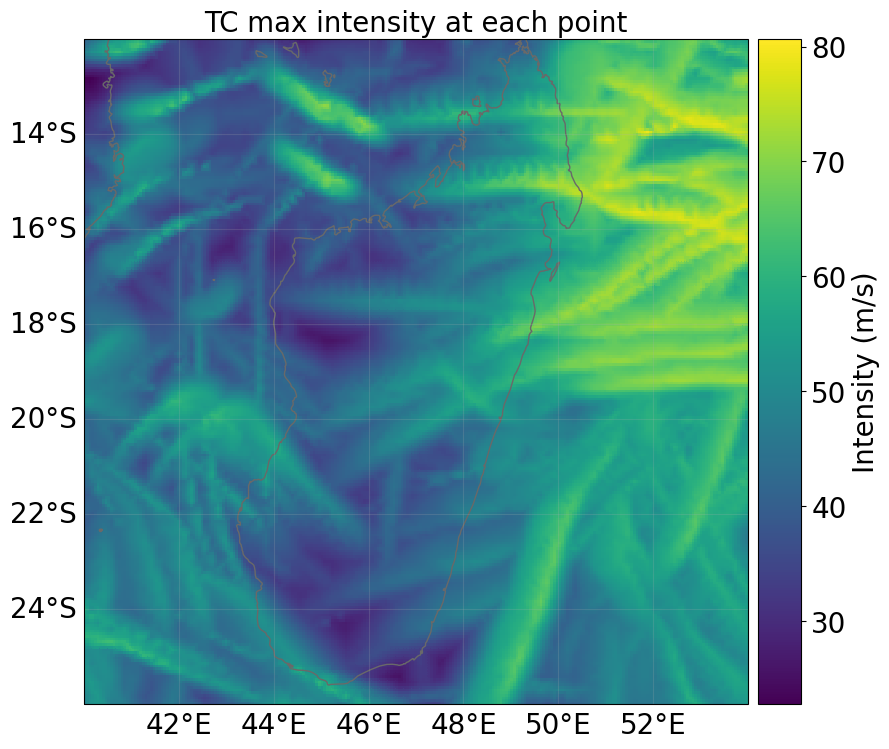

In [14]:
# create a hazard object from the probabilistic track set
tc_SI_proba = TropCyclone.from_tracks(tracks_SI_proba, centroids=cent)
tc_SI_proba.check()
tc_SI_proba.plot_intensity(event=0);

Use the following routine to check the wind speeds of different return periods using the probabilistic hazard event set:

2024-06-21 07:54:42,520 - climada.hazard.base - WARNING - Return period 250.0 exceeds max. event return period.


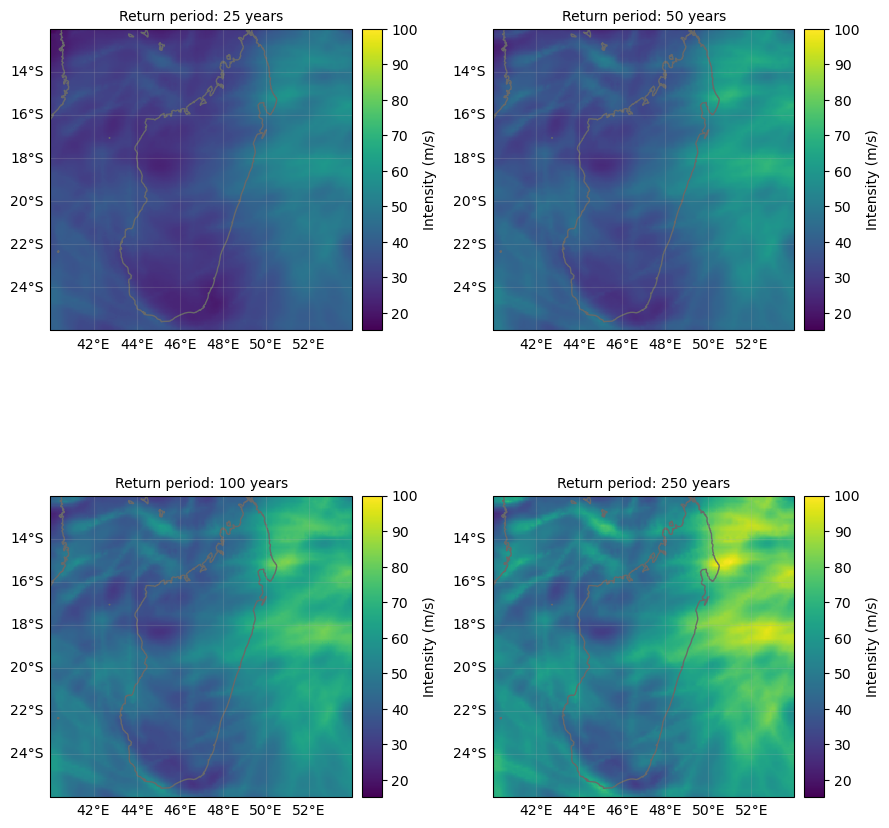

In [15]:
tc_SI_proba.plot_rp_intensity();

**1.d)** In the output graph of `plot_rp_intensity`: Describe what a 25-yr intensity represents?

The 25-yr intensity plot shows the maximal wind speed we expect to observe at each centroid within a period of 25 years. 

<font size="5"> **OPTION B: Fetching existing hazard data through the CLIMADA API**</font>

Hazard data may also be fetched from the CLIMADA API ([see tutorial](https://github.com/CLIMADA-project/climada_python/blob/main/doc/tutorial/climada_util_api_client.ipynb)). Check the following link to explore what is available: https://climada.ethz.ch/data-types/

**1.e)** Name three hazard datasets that can be fetched through the CLIMADA API.

River flood, earthquake and wildfire.

`Client` is a class which allows you to access this data. As a first step, you need to initiate a client object with the code below.

In [16]:
from climada.util.api_client import Client
client = Client()

Data can then be fetched with `client.get_hazard()`. Familiarize yourself with the method:

In [17]:
client.get_hazard?

Signature:
client.get_hazard(
    hazard_type,
    name=None,
    version=None,
    properties=None,
    status='active',
    dump_dir=PosixPath('/home/yitali/climada/data'),
)
Docstring:
Queries the data api for hazard datasets of the given type, downloads associated
hdf5 files and turns them into a climada.hazard.Hazard object.

Parameters
----------
hazard_type : str
    Type of climada hazard.
name : str, optional
    the name of the dataset
version : str, optional
    the version of the dataset
    Default: newest version meeting the requirements
properties : dict, optional
    search parameters for dataset properties, by default None
    any property has a string for key and can be a string or a list of strings for value
status : str, optional
    valid values are 'preliminary', 'active', 'expired', 'test_dataset', None
    by default 'active'
dump_dir : str, optional
    Directory where the files should be downoladed. Default: SYSTEM_DIR
    If the directory is the SYSTEM_DIR (a

We want to retrieve a hazard of the type `tropical_cyclone`. Explore which parameters are available for this hazard type:

In [18]:
# get metadata
hazard_type = 'tropical_cyclone'
info_tc = client.list_dataset_infos(hazard_type)

# list parameters
[print(item) for item in client.get_property_values(info_tc)]

# list parameters and possible values
print(client.get_property_values(info_tc))

# detailed description of first parameter
print(info_tc[0].description)

https://climada.ethz.ch/data-api/v1/dataset	data_type=tropical_cyclone	limit=100000	name=None	status=active	version=None
res_arcsec
event_type
model_name
spatial_coverage
climate_scenario
ref_year
country_iso3alpha
country_name
country_iso3num
genesis_basin
gcm
basin
{'res_arcsec': ['150'], 'event_type': ['synthetic', 'observed'], 'model_name': ['random_walk', 'STORM'], 'spatial_coverage': ['global', 'country', 'genesis_basin', 'basin'], 'climate_scenario': ['rcp26', 'rcp45', 'rcp60', 'None', 'rcp85'], 'ref_year': ['2040', '2060', '2080'], 'country_iso3alpha': ['AFG', 'ARE', 'BGD', 'BHR', 'BRN', 'BTN', 'CHN', 'DJI', 'EGY', 'ERI', 'ETH', 'FSM', 'GUM', 'HKG', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KOR', 'KWT', 'LAO', 'LKA', 'MAC', 'MDV', 'MHL', 'MMR', 'MNG', 'MNP', 'MYS', 'NPL', 'OMN', 'PAK', 'PHL', 'PLW', 'PRK', 'QAT', 'RUS', 'SAU', 'SDN', 'SGP', 'SOM', 'SYR', 'THA', 'TWN', 'USA', 'VNM', 'YEM', 'ALA', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG'

**1.f)** Retrieve two tropical cyclone hazard event sets for Madagascar (MDG) using the function `client.get_hazard()` and plot one event. The first event set should be comparable to the original (historical) event set created in Option A. The second event set should be comparable to the probabilistic event set created in Option A. You will have to define the three properties `country_iso3alpha, climate_scenario, event_type` correctly. 

In [19]:
# complete the code to retrieve a historical tropical cyclone event set
properties = {
    'country_iso3alpha': 'MDG',
    'climate_scenario': 'None',  
    'event_type': 'observed'  
}
tc_MDG = client.get_hazard(hazard_type=hazard_type, properties=properties)

# complete the code to retrive a probabilistic tropical cyclone event set
properties = {
    'country_iso3alpha': 'MDG',
    'climate_scenario': 'None',  
    'event_type': 'synthetic'  
}
tc_MDG_proba = client.get_hazard(hazard_type=hazard_type, properties=properties)

https://climada.ethz.ch/data-api/v1/dataset	climate_scenario=None	country_iso3alpha=MDG	data_type=tropical_cyclone	event_type=observed	limit=100000	name=None	status=active	version=None
https://climada.ethz.ch/data-api/v1/dataset	climate_scenario=None	country_iso3alpha=MDG	data_type=tropical_cyclone	event_type=synthetic	limit=100000	name=None	status=active	version=None


Compare the two datasets visually:

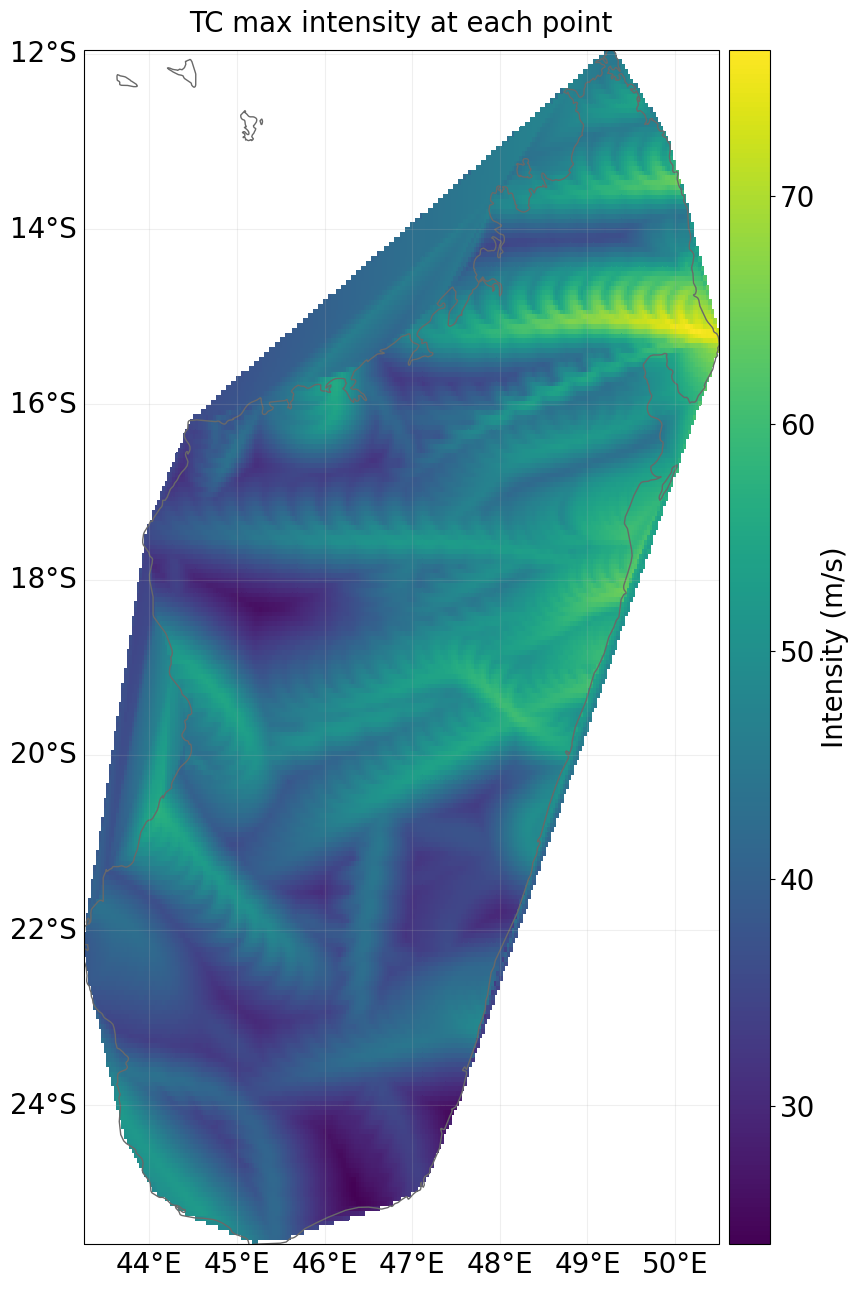

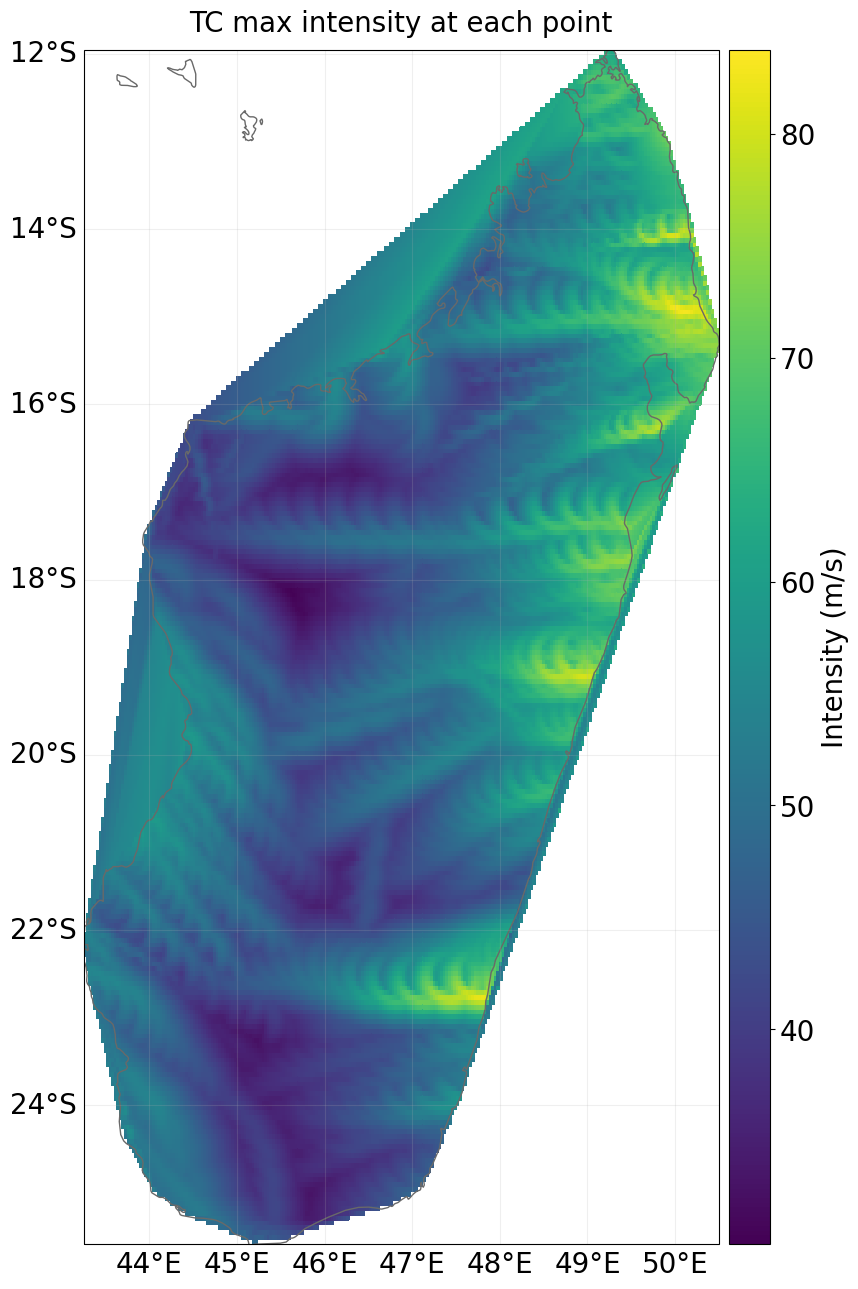

In [20]:
tc_MDG.plot_intensity(0);
tc_MDG_proba.plot_intensity(0);

Finally, store the two event sets in the files `tc_SI.hdf5` and `ts_SI_proba.hdf5` for re-use in exercise 2:

In [21]:
import os

# Define the directory path
directory = 'IAC_lectures/2024_FS/CCUR/Groupwork/2_CLIMADA/data/'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Now you can write the HDF5 files
tc_MDG.write_hdf5(directory + 'tc_SI.hdf5')
tc_MDG_proba.write_hdf5(directory + 'tc_SI_proba.hdf5')

In [22]:
tc_MDG.write_hdf5(data_dir.joinpath('tc_SI.hdf5'))
tc_MDG_proba.write_hdf5(data_dir.joinpath('tc_SI_proba.hdf5'))

<font size="5"> **CLIMADA EXERCISE 2** to the lecture<br>
<font size="4"> Climate Change Uncertainty and Risk: from Probabilistic Forecasts to Economics of Climate Adaptation</font>

**Prof. Reto Knutti and Prof. David Bresch** <br>
Spring Term 2024<br>
<br>
**Tutors**<br>
Donghe Zhu (donghe.zhu@env.ethz.ch)<br>
Gergana Gyuleva (gergana.gyuleva@env.ethz.ch)<br>
Timo Schmid (timo.schmid@usys.ethz.ch)<br>
Sarah Hülsen (sarah.huelsen@usys.ethz.ch)<br>

All relevant course information to be found here:<br>
http://www.iac.ethz.ch/edu/courses/master/modules/climate-risk.html<br>
Everything for CLIMADA (tutorials, code) can be downloaded from GitHub:<br>
https://github.com/CLIMADA-project/climada_python

In the lecture, we've learned that catastrophe risk hinges on the three components hazard, exposure and vulnerability. In the first exercise we saw how CLIMADA generates a probabilistic hazard event set for tropical cyclones in Madagaskar, based on the experience of past storms. In this exercise we'll first create an exposure layer and set up the vulnerability component to subsequently run our first impact calculation. We'll then learn how to treat uncertainty and touch on the effects of insurance.

<font size="5"> **2. Exposure creation**</font>

In this part you will create the exposure describing the assets (infrastructure) which might be at risk in Madagaskar. In CLIMADA the class [`Exposures`](https://climada-python.readthedocs.io/en/latest/tutorial/1_main_climada.html#Exposures) and more specifically the derived class [`LitPop`](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_LitPop.html) are defined to hold all information of the assets at risk. Click on the respective links to learn how to use these classes. We here show you how to get a LitPop object through the [`Data API`](https://climada-python.readthedocs.io/en/latest/tutorial/climada_util_api_client.html?highlight=api).


<font size="4"> **Get the exposure based on nightlight**</font>

LitPop can approximate economic exposure based on nightlight luminosity retrieved from satelite data to spatially distribute a socio-economic variable (i.e. GDP, total assets).

Execute the following code to create the exposure based on distribution of nightlight luminosity. Asset values were found to be best represented with a power 3 of the nightlight intensity, defined by the first exponent.


https://climada.ethz.ch/data-api/v1/dataset	country_iso3alpha=MDG	data_type=litpop	exponents=(3,0)	limit=100000	name=None	status=active	version=v2


<GeoAxesSubplot:>

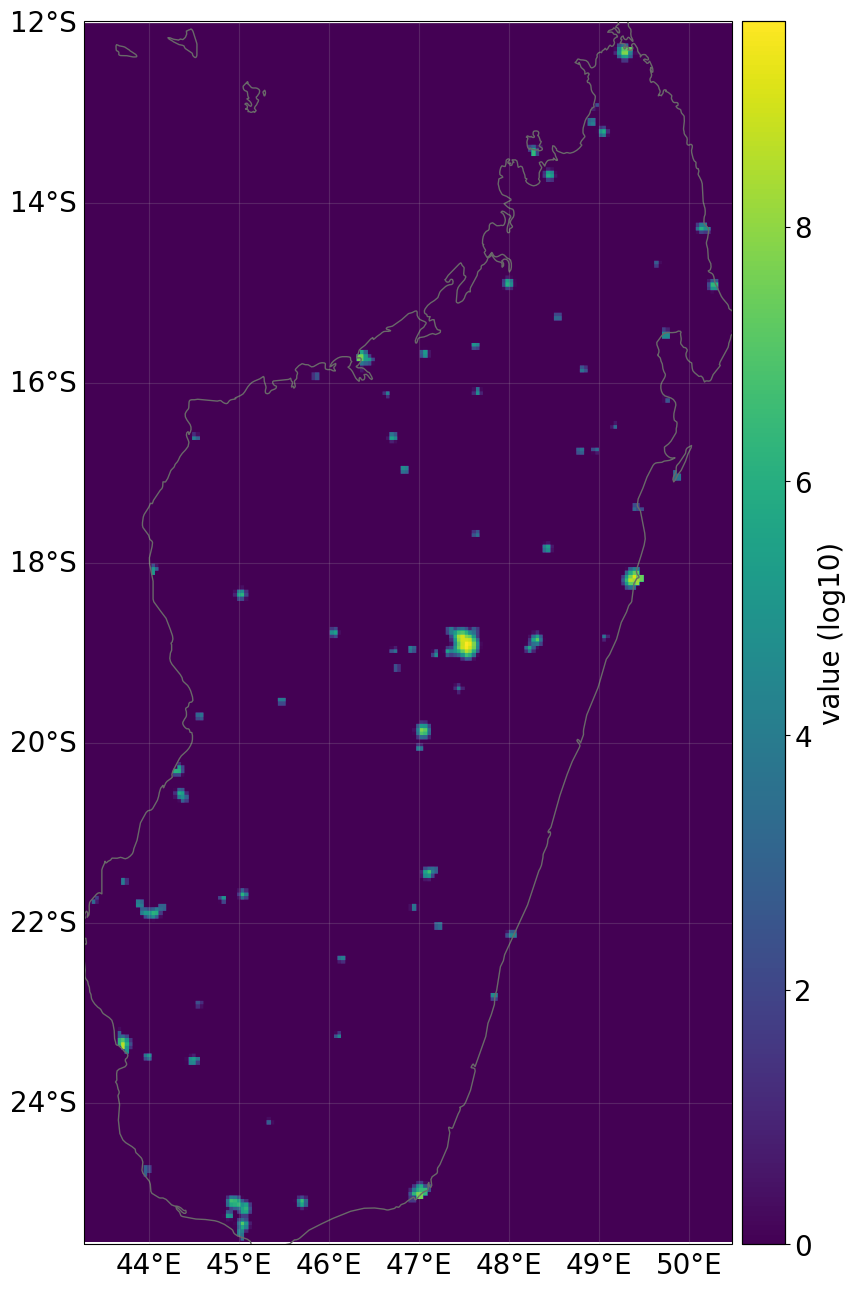

In [23]:
from climada.util.api_client import Client
client = Client()

MDG_nightlight = client.get_exposures('litpop', properties={'country_iso3alpha':'MDG', 'exponents': '(3,0)', 'version': 'v2'})
MDG_nightlight.plot_raster()

Compare the plot with a map of Madagaskar (use i.e. google maps). What features can you recognize in the exposure? Where do you think lay limits of this approach?

The bright spots on the map correspond with urban areas on google maps. With this approach, we're able to recognize cities, and city infrastructure that might be at risk. However, this approach does not account for areas wich have less nightlight-intense infrastructure or in general less infrastructure, but are nevertheless valuable and/or populated by people. 

`print` the variable MDG_nightlight and examine its structure and content:

In [24]:
print(MDG_nightlight)

tag:  File: 
 Description: LitPop Exposure for ['MDG'] at 150 as, year: 2018, financial mode: pc, exp: (3, 0), admin1_calc: False
ref_year: 2018
value_unit: USD
meta: {'width': 174, 'height': 327, 'crs': <Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, 'transform': Affine(0.041666660000004185, 0.0, 43.25,
       0.0, -0.04166665999999708, -11.958333340000001)}
crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
data:
              value                    geometry   latitude  longitude  \
0      0.000000e+00  POINT (49.22917 -11.97917) -11.979167  49.2

<font size="4"> **Get the exposure including the second layer of LitPop**</font>


The LitPop class can also consider a second layer in order to produce the distribution of assets. What is the second input? 

The second input is population count.

Get another exposure for Madagaskar considering both layers by modifying the 'exponents' property in the client.get_exposures() method. To understand which values are available, have a look at the LitPop.from_countries() method which was used to create the LitPop exposures available through the API. A limited number of datasets are available through the API, if you would be interested to play around with other values, you would have to generate LitPop exposures yourself with the LitPop.from_countries() method (not asked here).

In [25]:
from climada.entity import LitPop
LitPop.from_countries?

Signature:
LitPop.from_countries(
    countries,
    res_arcsec=30,
    exponents=(1, 1),
    fin_mode='pc',
    total_values=None,
    admin1_calc=False,
    reference_year=2018,
    gpw_version=11,
    data_dir=PosixPath('/home/yitali/climada/data'),
)
Docstring:
Init new LitPop exposure object for a list of countries (admin 0).

Sets attributes `ref_year`, `tag`, `crs`, `value`, `geometry`, `meta`,
`value_unit`, `exponents`,`fin_mode`, `gpw_version`, and `admin1_calc`.

Parameters
----------
countries : list with str or int
    list containing country identifiers:
    iso3alpha (e.g. 'JPN'), iso3num (e.g. 92) or name (e.g. 'Togo')
res_arcsec : float, optional
    Horizontal resolution in arc-sec.
    The default is 30 arcsec, this corresponds to roughly 1 km.
exponents : tuple of two integers, optional
    Defining power with which lit (nightlights) and pop (gpw) go into LitPop. To get
    nightlights^3 without population count: (3, 0).
    To use population count alone: (0, 1).
   

https://climada.ethz.ch/data-api/v1/dataset	country_iso3alpha=MDG	data_type=litpop	exponents=(1,1)	limit=100000	name=None	status=active	version=v2


<GeoAxesSubplot:>

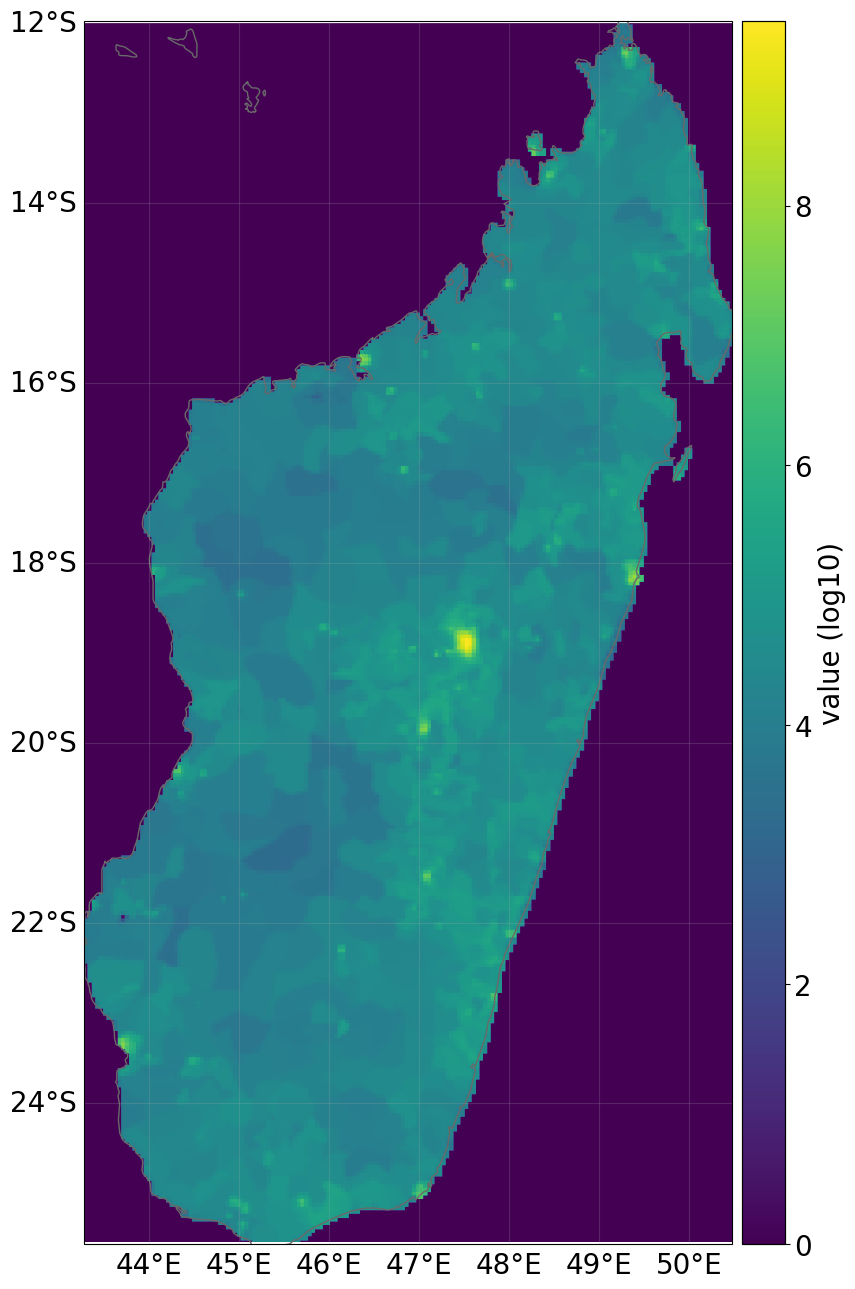

In [26]:
# Your code comes here
MDG_LitPop = client.get_exposures('litpop', properties={'country_iso3alpha':'MDG', 'exponents': '(1,1)','version': 'v2'})
MDG_LitPop.plot_raster()

**2.a)** What is the difference between the two assets representation? (2-3 sentences)



The nightlight assets representation only highlights very nightlight-intense places, which usually are very industrialised areas and leaves all the other places away. Contrary, the litpop representation shows a more even distribution, since it takes not only nightlight luminosity into account, but additionnaly also population distribution and thus also accounts for people's lifes. 

**2.b)** What are the advantages and disadvantages of including population data to represent the assets in Madagascar for the risk assessment of tropical cyclones? (2-3 sentences)

An advantage of including population data to represent the assets in Madagascar might be that it helps to better account for people's lives, especially in rural areas. If we compare the two maps, we can see that rural areas in Madagascar are quite densly populated and not just urban areas. This is not well recognizble in the nightlight-only representation. A disadvantage might be that it becomes more difficult to identify the places that are more likely to have the highest economic loss due to expensive infrastructure, since the maps is more evenly distributed. 

**Important:** Going forward please use the LitPop exposure data created with the exponents (1,1).

<font size="5"> **3. Vulnerability** </font>

In order to calculate the impacts for a given hazard event set and a given exposure you need to define the corresponding impact function. Impact functions are used to represent the vulnerability component by relating a hazard intensity to the mean damage ratio at each centroid. In CLIMADA all information of exposure, vulnerability and adaptation measures is stored in one container called [`Entity`](https://climada-python.readthedocs.io/en/latest/tutorial/1_main_climada.html#Entity). In this exercise we only look at the exposure and vulnerability components of the entity. In Exercise 3, you'll in addition get familiar with the adaptation measures, the third component of the entity.  

In a first step, we create an empty entity container and add the exposure defined earlier in this exercise. In a second step, we define an impact function which relates the wind speed to the mean damage ratio at each centroid and add it to the entity container.

<font size="4"> **Entity** </font>

Execute the following code to create an entity container:

In [27]:
from climada.entity import Entity
ent_MDG = Entity()

Add the LitPop exposure created earlier:

In [28]:
ent_MDG.exposures = MDG_LitPop # You might need to adjust the variable name to match the name of your LitPop exposure
ent_MDG.check()

 As always, we recommend to quickly investigate the components and data structure that we work with:

In [29]:
#help(ent_MDG.exposures.gdf)

<font size="4"> **Impact Function**</font>

As mentioned above, impact functions are used to represent the vulnerability component by relating a wind intensity to the mean damage ratio (MDR) at each centroid. The MDR can be unserstood as the product of percentage of affected assets (PAA) and the mean damage degree (MDD). Thus, MDR = MDD * PAA. For simlicity, we assume in this exercise that all assets are affected, thus PAA==1, and only model MDD.

As it is common practice in natural hazard impact modelling we use a sigmoid-type impact function proposed by [Emanuel (2011)](https://doi.org/10.1175/WCAS-D-11-00007.1) and calibrated by [Eberenz et al. (2021)](https://doi.org/10.5194/nhess-21-393-2021):

\begin{equation}
    f_{emanuel} = \frac{v_{n}^{3}}{1+v_{n}^{3}}
\end{equation}

with

\begin{equation}
    v_n = \frac{MAX[(V-V_{thresh}), 0]}{V_{half}-V_{thresh}}
\end{equation}

where $V$ denotes the wind speed at a specific grid point. $V_{thresh}$, the minimum intensity where damages occur and $V_{half}$, which can be seen as the steepness of the sigmoid function, are the two paramaters that need calibration. In this exercise we set $V_{thresh}$ = 25.7 m/s and $V_{half}$ = 46.8 m/s. ([Eberenz et al., 2021](https://doi.org/10.5194/nhess-21-393-2021); values for South Indian Ocean)

In CLIMADA the class [`ImpFuncSet`](https://climada-python.readthedocs.io/en/latest/tutorial/climada_entity_ImpactFuncSet.html) holds all information of the impact functions. Complete the code below to implement the impact function. 

In [30]:
import numpy as np
from climada.entity import ImpactFunc, ImpactFuncSet

ImpF = ImpactFunc()
ImpF.id = 1
ImpF.name = 'Emanuel'
ImpF.intensity_unit = 'm/s'
ImpF.haz_type = 'TC'
ImpF.intensity = np.arange(0, 121, 5) # Intensity range over which the ImpF is defined

**3.a)** Define PAA (`ImpF.paa`) as np.array with the same shape as `ImpF.intensity` and constantly equalling 1.

Hint: To create a np.array containing 1 you can use `np.ones()`.

In [31]:
ImpF.paa = np.ones_like(ImpF.intensity)

**3.b)** Define MDD (`ImpF.mdd`) by implementing the Emanuel function. Make sure that the function does not become negative. What is the expected relative damage at an intensity of 50 m/s?

Hint: To create the function, you can set $V$ equal to `ImpF.intensity`.

In [32]:
# Your code comes here
v_half = 46.8
v_thresh = 25.7
v = ImpF.intensity
vn = np.maximum((v-v_thresh),0)/(v_half-v_thresh)
ImpF.mdd = vn**3/(1+vn**3)

In [33]:
index = np.where(ImpF.intensity == 50)[0][0]
r_damage50 = ImpF.mdd[index]

print(f"The expected relative damage at an intensity of {50} m/s is {r_damage50:.4f}")

The expected relative damage at an intensity of 50 m/s is 0.6043


We now append the impact function created above to the entity container in the correct form and plot it. 

<AxesSubplot:title={'center':'TC 1: Emanuel'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

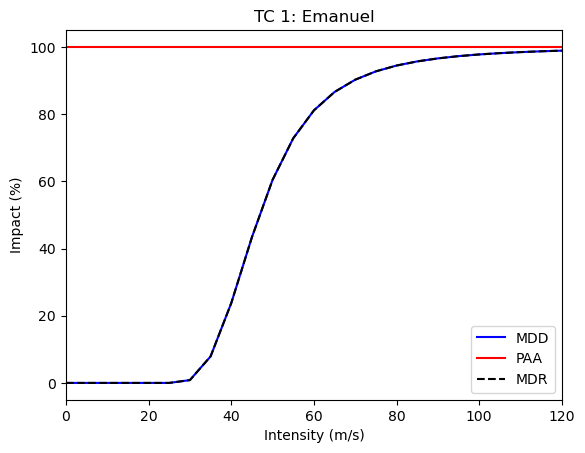

In [34]:
ent_MDG.impact_funcs = ImpactFuncSet()
ent_MDG.impact_funcs.append(ImpF)
ent_MDG.impact_funcs.plot()

Now, we have everything to calculate the impacts.

<font size="5"> **4. Impact calculation** </font>

In this part you will calculate the impacts of tropical cyclones in Madagaskar. The module called engine with the class [`Impact`](https://climada-python.readthedocs.io/en/latest/tutorial/1_main_climada.html#Impact) is used to calculate the impacts and store the results. The tutorial explains how to use this class.

For the impact calculation you'll use the hazard we created in 1.), the exposure we created in 2.) and the entity (resp. the impact function stored in the entity) we generated in 3.).

First, reload the hazard created in 1.) and plot it:

**Important:** Make sure that in exercise 1 you have used the following properties for loading the historical and probabilistic hazard event set, respectively: 
```python
properties = {'country_iso3alpha':'MDG', 'climate_scenario': 'None', 'event_type': 'observed'}
properties = {'country_iso3alpha':'MDG', 'climate_scenario': 'None', 'event_type': 'synthetic'}
```

<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

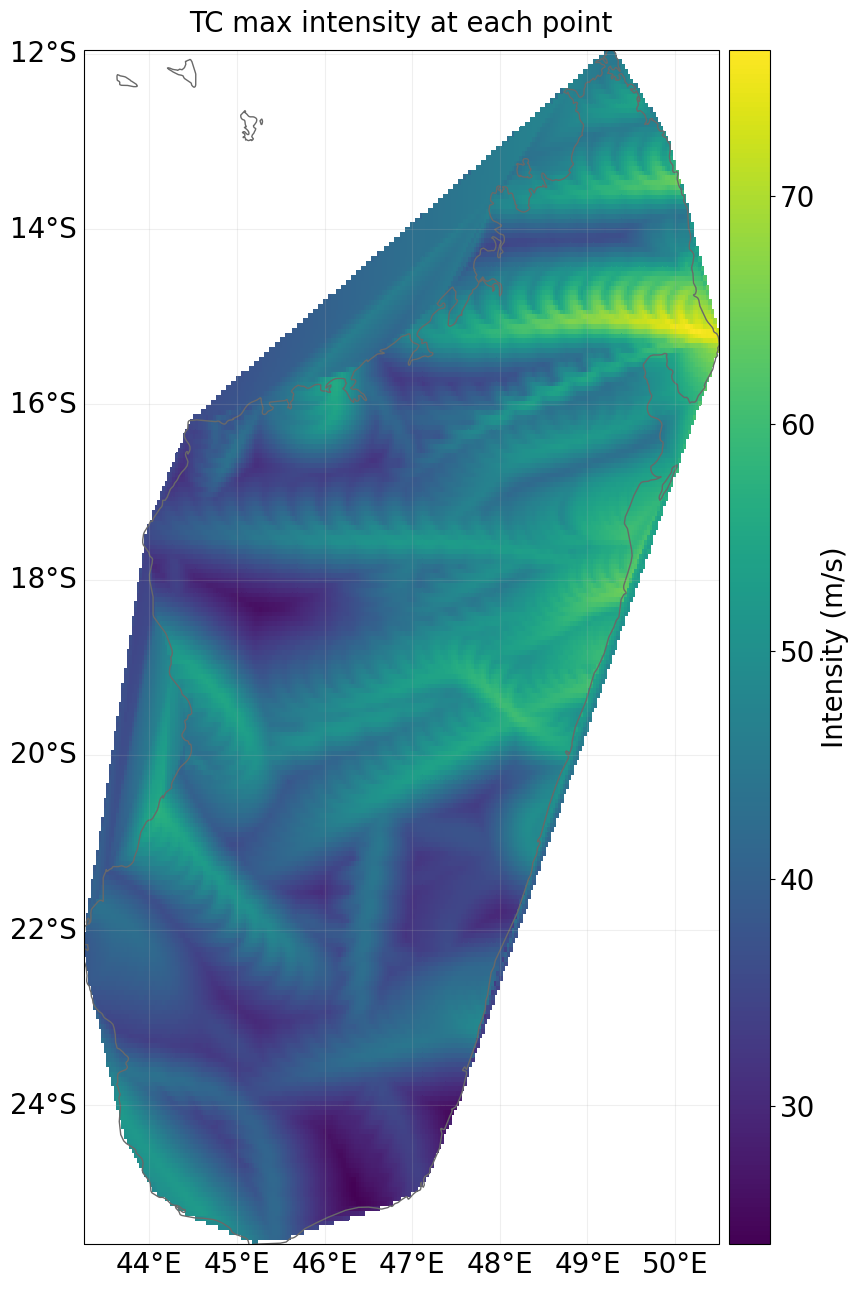

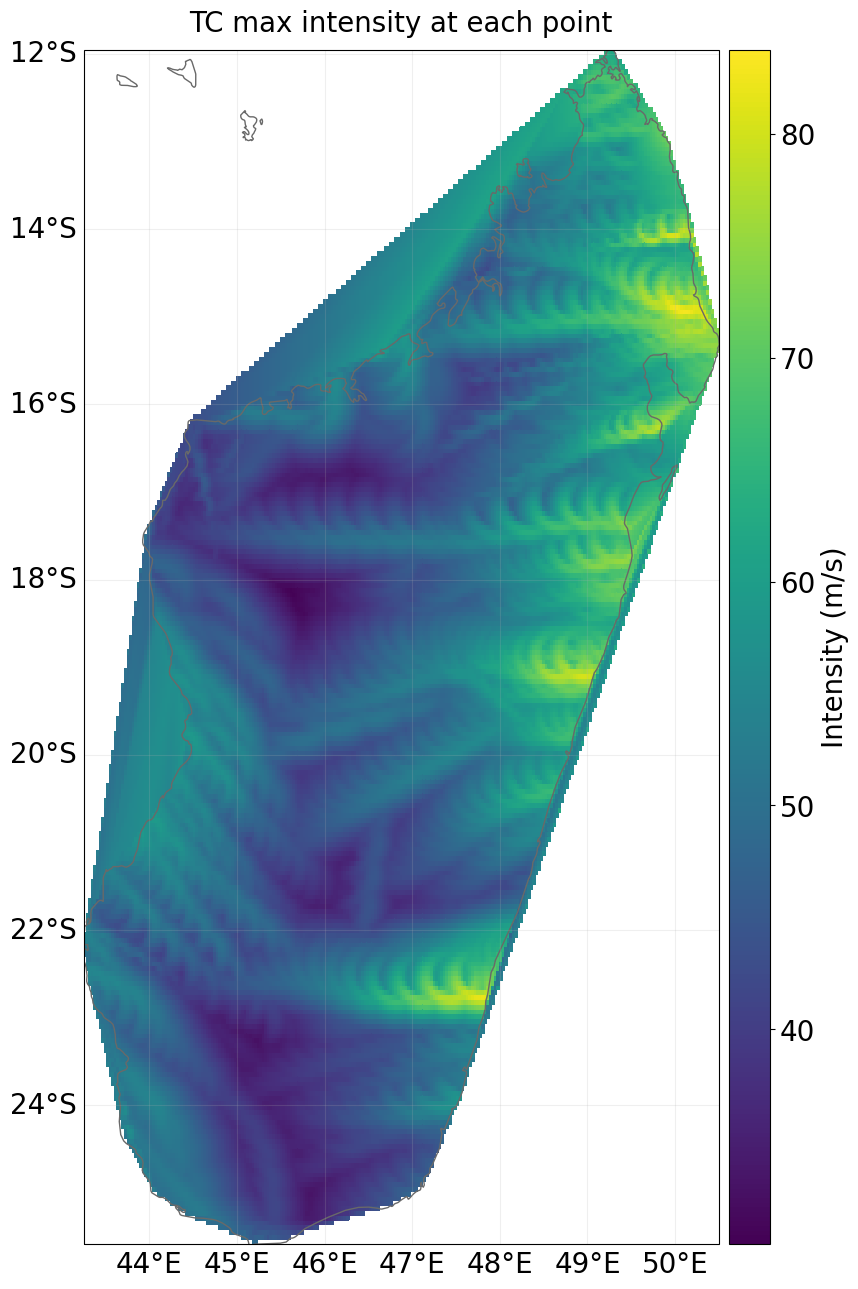

In [35]:
from climada.hazard import TropCyclone

# load the historic storm set from Exercise 1
file_name_haz = './data/tc_SI.hdf5' # make sure to adjust the path to your historic dataset
tc_SI = TropCyclone.from_hdf5(file_name_haz)
tc_SI.plot_intensity(0) # check that it's loaded correctly

# load the probabilistic storm set from Exercise 1
file_name_haz_proba = './data/tc_SI_proba.hdf5' # make sure to adjust the path to your probabilistic dataset
tc_SI_proba = TropCyclone.from_hdf5(file_name_haz_proba)
tc_SI_proba.plot_intensity(0) # check that it's loaded correctly

Then, compute the impact for both hazard data sets:

In [36]:
from climada.engine import ImpactCalc

# calculate the impact with the historic storm set
imp_MDG = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_SI).impact()

# calculate the impact with the probabilistic storm set
imp_MDG_proba = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_SI_proba).impact()

**4.a)** What percentage of the probabilistic storm set actually cause impacts? Use the calculated impact at event `imp_MDG_proba.at_event` for this purpose. Identify the largest impact, ﬁnd its corresponding wind ﬁeld and plot it.

In [37]:
# Your code comes here
impact_events = np.sum(imp_MDG_proba.at_event > 0.0)
total_events = len(imp_MDG_proba.at_event) 
perc_impact_events = (impact_events/total_events)*100
print(f"{perc_impact_events:.2f}% of the events in the probabilistic storm set cause an impact in Madagascar")

1.70% of the events in the probabilistic storm set cause an impact in Madagascar


In [38]:
index_max_impact = np.argmax(imp_MDG_proba.at_event)
max_impact_value = imp_MDG_proba.at_event[index_max_impact]
print(f"The event with the largest impact in the probabilistic storm set is at index {index_max_impact} with an estimated impact of {max_impact_value:.2f} USD")

The event with the largest impact in the probabilistic storm set is at index 6633 with an estimated impact of 12398983371.95 USD


<GeoAxesSubplot:title={'center':'Event ID 6634: 2000032S11116'}>

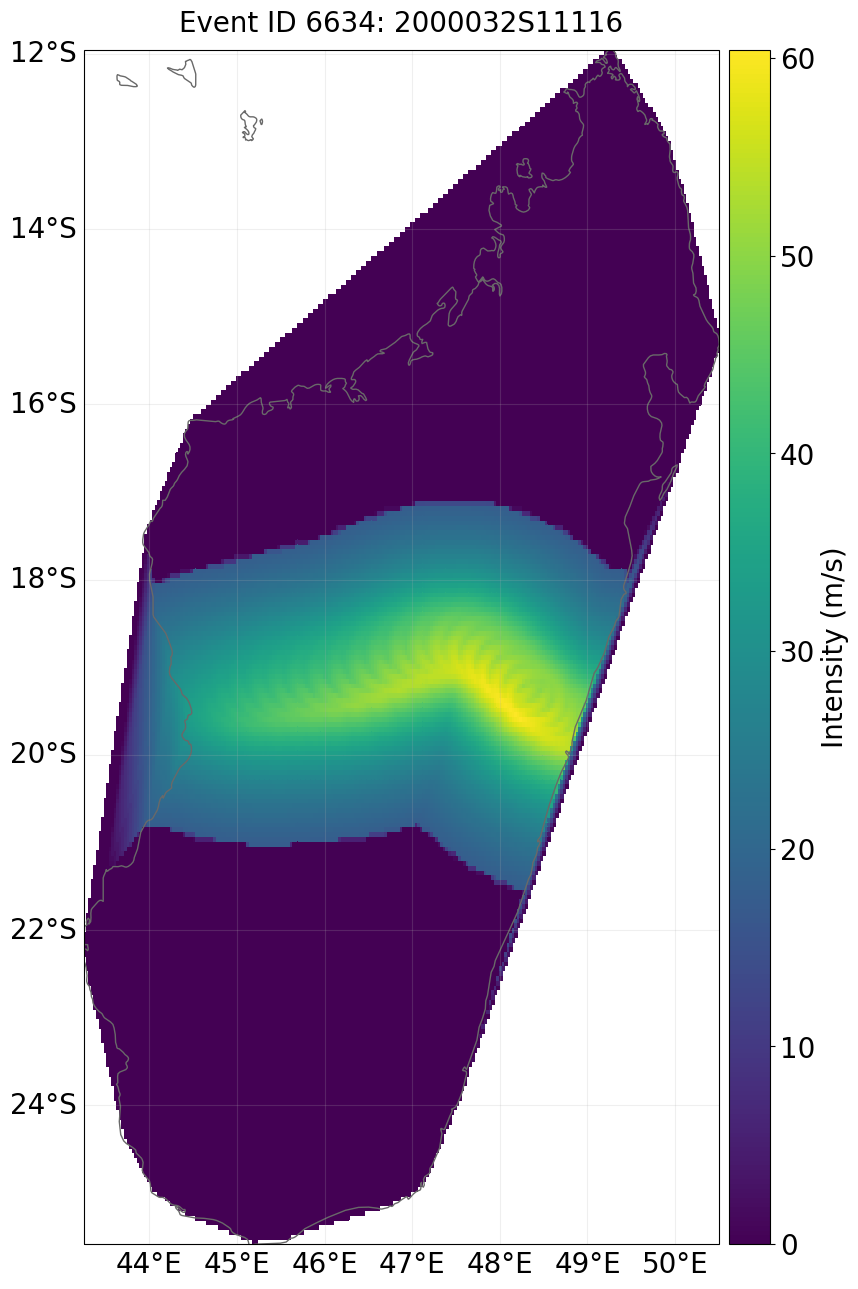

In [39]:
tc_SI_proba.plot_intensity(event=6634)

<font size="4"> **Calculate the Average Annual Impact (AAI)**</font>

Since we are considering a probabilistic set the AAI is a reasonable quantity to look at. The AAI is the sum of the frequency-weighted impacts.

**4.b)** What is your calculated AAI? Show us your code to calculate it.

In [40]:
# Your code comes here
print('Average Annual Impact (AAI) with probabilistic set: {:.3e} USD.'.format(imp_MDG_proba.aai_agg))

Average Annual Impact (AAI) with probabilistic set: 3.180e+08 USD.


<font size="4"> **Calculate the Impact Exceedence Frequency Curve**</font>

The impact exceedance frequency curve relates the return period of each storm to its estimated impact. To calculate the return periods we assume that the most severe storm occurs once during the observational period; the second most severe storm returns twice and so on. Calculate the impact exceedance frequency curve for a the historical storm set with the method `calc_freq_curve()` and plot it. 

<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

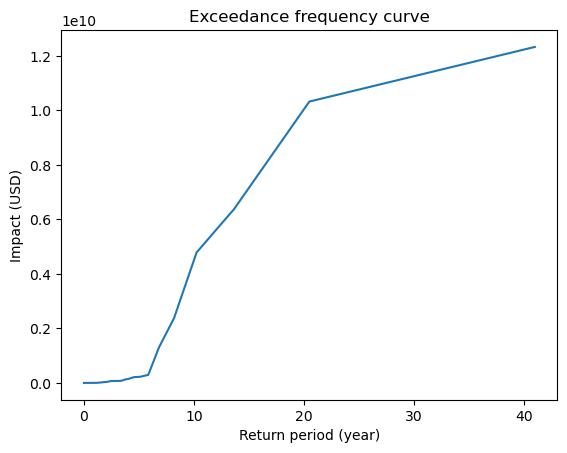

In [41]:
# calculate the impact exceedance frequency for the historical storm set
freq_curve_MDG = imp_MDG.calc_freq_curve()
freq_curve_MDG.plot()

**4.c)** Calculate and plot the impact exceedance frequency curve for the probabilistic storm set (as done for the historical storm set above). 

What is the return period of TC Geralda (which caused 10.3 billion USD in damages; Exercise 1) in the probabilistic event set? Chose one of the three suggestions below: 
- approx. 5 years
- approx. 25 years
- above 100 years

How does this value compare to the return period in the historical dataset and how can the difference be interpreted?  (2-4 sentences)

<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

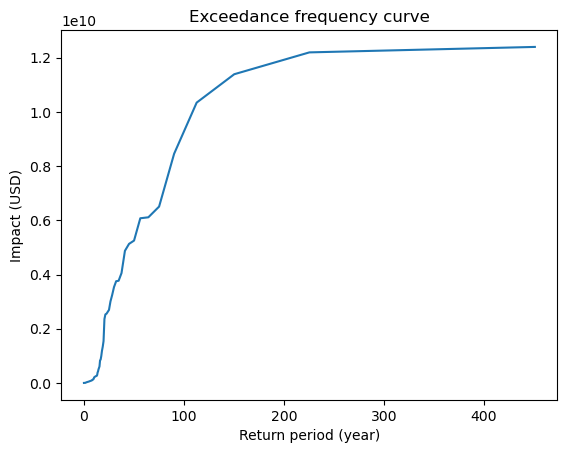

In [42]:
# Your code comes here
freq_curve_MDG_proba = imp_MDG_proba.calc_freq_curve()  
freq_curve_MDG_proba.plot()

In the probabilistic TC set a storm with a similar impact as TC Geralda (10.3 billion USD) has a return period of above 100 years. In the historical TC set the return period for a storm with this impact is much shorter, around 20-25 years. This indicates that large impact storms are much more frequent in the historical data set than in the probabilistic data set. However, since the historical data set is only looking at a very short time period, it is possible that this return period is not representative. If an event like TC Geralda falls exactly in this time period, the return period might mistakenly be assumed much shorter than it is. Looking at a longer time period, resp. the probabilistic set will probably give us better results for this purpose.

<font size="5"> **5. Dealing with uncertainty** </font>

Impact functions are empirically fitted functions that come along with large uncertainties. Examine the elements of the impact functions in `ent_MDG.impact_funcs`. We are now going to modify some of the fields in this class to evaluate uncertainties in the impact calculation.

In your `ent_MDG.exposures` you can check the field `impf_` which is defined for all your assets. This selects the impact function used in the impact calculation. So far, all assets were assigned the impact function “1” as we didn't define anything further.

In [43]:
ent_MDG.exposures.gdf.head()

value                    geometry   latitude  longitude  region_id  \
0  3967.289587  POINT (49.22917 -11.97917) -11.979167  49.229167        450   
1  5609.109382  POINT (49.27083 -11.97917) -11.979167  49.270833        450   
2  5410.297132  POINT (49.22917 -12.02083) -12.020833  49.229167        450   
3  6916.511694  POINT (49.27083 -12.02083) -12.020833  49.270833        450   
4  3598.535474  POINT (49.31250 -12.02083) -12.020833  49.312500        450   

   impf_  centr_TC  
0      1         1  
1      1         1  
2      1         1  
3      1         1  
4      1         2

We'll now create another impact function with `ImpF.id = 2`, append it to our `ImpFuncSet` and then subsequantly adjust `impf_` in the `Exposure` to run the calculation with a new impact function.

In [44]:
ImpF_new = ImpactFunc()
ImpF_new.id = 2
ImpF_new.name = 'New IF'
ImpF_new.intensity_unit = 'm/s'
ImpF_new.haz_type = 'TC'
ImpF_new.intensity = np.arange(0, 121, 5) # intensity range over which the ImpF is defined

**5.a)** Define a new impact function, append it to the `ImpFuncSet` and plot it. You can either create an impact function of the same type as in 3.) and vary the parameters $V_{thresh}$ and $V_{half}$ or you can define an entirely new impact function. Make sure it is kept within the physically plausible boundaries (thus between 0% and 100%).

<AxesSubplot:title={'center':'TC 2: New IF'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

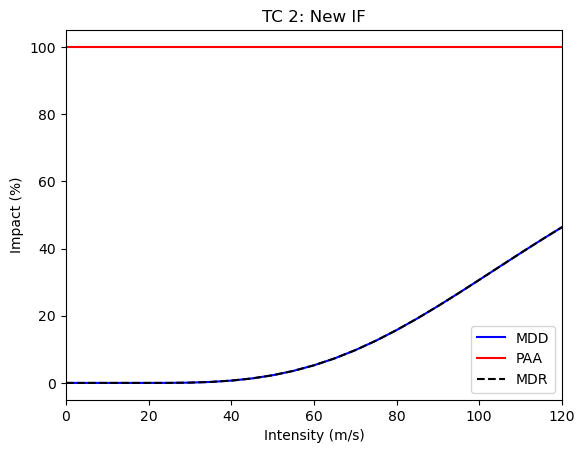

In [45]:
# Your code comes here
p_half = 125
p_thresh = 20
p = ImpF_new.intensity
pn = np.maximum((p-p_thresh),0)/(p_half-p_thresh)
ImpF_new.mdd = pn**3/(1+pn**3)

ImpF_new.paa = np.ones_like(ImpF_new.intensity)

ent_MDG.impact_funcs = ImpactFuncSet()
ent_MDG.impact_funcs.append(ImpF_new)
ent_MDG.impact_funcs.plot()

**5.b)** Recalculate the impacts (use the probabilistic hazard event set) with the newly assigned impact functions and compare the AAI, the impact at 50 and at 250 year return period, as well as the impact exceedance frequency curve. Make sure you adjust `ent_MDG.exposures.gdf.impf_` such that the new impact function is used for the calculations. Discuss the differences? (2-4 sentences)

In [46]:
# Your code comes here
ent_MDG.exposures.gdf.impf_ = 2

# Calculate new impact functions for the probablistic dataset
imp_MDG_proba_2 = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_SI_proba).impact()

print('AAI with new impact function 2: {:.3e} USD'.format(imp_MDG_proba_2.aai_agg))

AAI with new impact function 2: 1.216e+07 USD


<AxesSubplot:title={'center':'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

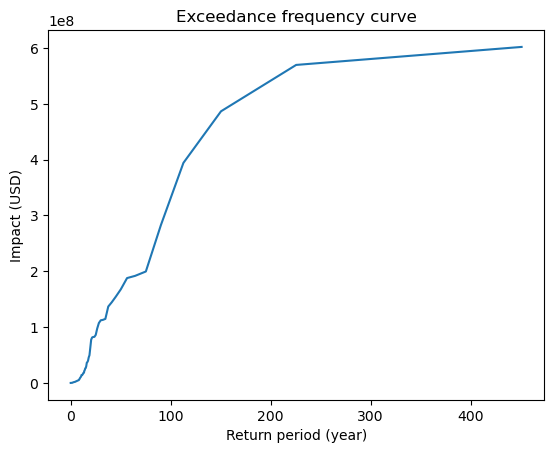

In [47]:
freq_curve_MDG_proba_2 = imp_MDG_proba_2.calc_freq_curve()  
freq_curve_MDG_proba_2.plot()

In [48]:
#with IF 2
def get_return_impact(freq_curve_MDG_proba_2, return_per_target):
    idx = np.where((freq_curve_MDG_proba_2.return_per <= return_per_target) & (return_per_target <= np.roll(freq_curve_MDG_proba_2.return_per, -1)))[0][0]
    return np.interp(return_per_target,
              [freq_curve_MDG_proba_2.return_per[idx],freq_curve_MDG_proba_2.return_per[idx+1]],
              [freq_curve_MDG_proba_2.impact[idx], freq_curve_MDG_proba_2.impact[idx+1]])
    
#50 year return period
impact_50 = get_return_impact(freq_curve_MDG_proba_2, 50)
print("The %d year return period impact with impact function 2 is %.2e USD." %(50, impact_50))

#250 year return period
impact_250 = get_return_impact(freq_curve_MDG_proba_2, 250)
print("The %d year return period impact with impact function 2 is %.2e USD." %(250, impact_250))

The 50 year return period impact with impact function 2 is 1.67e+08 USD.
The 250 year return period impact with impact function 2 is 5.73e+08 USD.


In [49]:
#Do the same for the first impact function: 
def get_return_impact(freq_curve_MDG_proba, return_per_target):
    idx = np.where((freq_curve_MDG_proba.return_per <= return_per_target) & (return_per_target <= np.roll(freq_curve_MDG_proba.return_per, -1)))[0][0]
    return np.interp(return_per_target,
              [freq_curve_MDG_proba.return_per[idx],freq_curve_MDG_proba.return_per[idx+1]],
              [freq_curve_MDG_proba.impact[idx], freq_curve_MDG_proba.impact[idx+1]])
    
#50 year return period
impact_1_50 = get_return_impact(freq_curve_MDG_proba, 50)
print("The %d year return period impact with impact function 1 is %.2e $." %(50, impact_1_50))

#250 year return period
impact_1_250 = get_return_impact(freq_curve_MDG_proba, 250)
print("The %d year return period impact with impact function 1 is %.2e $." %(250, impact_1_250))

The 50 year return period impact with impact function 1 is 5.25e+09 $.
The 250 year return period impact with impact function 1 is 1.22e+10 $.


The new impact function 2, which has higher v_half and lower v_thresh values than impact function 1, leads to a much lower and slower impact increase. Correlating, the 50 year and the 250 year return period impacts with impact function 2 are significantly less high than with impact function 1. This has an effect on the AAI, which becomes a lot smaller for impact function 2. 

<font size="5"> **6. Effect of insurance**</font>

<font size="4"> **Proportional insurance**</font>

**6.a)** To the calculated the impact at an event, apply a proportional insurance of 30% (insure 30% of the impact). What is the change in AAI (the portion of the impact that remains to the insured after application of a 30% proportional insurance)?

Remember, for proportional insurance:
\begin{equation}
    I_{after} = I_{before} - I_{before} * s_{insured}
                = I_{before} * (1 - s_{insured})
\end{equation}

where $I_{after}$ is the impact that remains to the insured after the application of insurance and $s_{insured}$ is the share covered by the insurer.


In [50]:
# Your code comes here 
import copy as cp
insurance = cp.deepcopy(imp_MDG_proba)
insurance_events = insurance.at_event * (1 - 0.3)
aai_insurance = np.sum(insurance.frequency*insurance_events)
print('AAI with 30% proportional insurance: {:.3e} USD'.format(aai_insurance))

AAI with 30% proportional insurance: 2.226e+08 USD


<font size="4"> **Non-proportional insurance** </font>

**6.b)** Now, let’s apply a non-proportional insurance. The insurance shall attach at the level of the 50-year impact (= the deductible) and cover all impacts up to the 100-year event. What is the effect on AAI (of the insured)?

Remember, for non-proportional insurance:
\begin{equation}
    I_{after} = I_{before} - min(max(I_{before}-d, 0) , c)
\end{equation}

where $d$ denotes the deductible and $c$ the cover. The cover is deﬁned as the maximum amount the non-proportional insurance is paying. Make sure to make the calculations per event and recalculate the AAI.

In [51]:
# Your code comes here
insurance_np = cp.deepcopy(imp_MDG_proba)
c = get_return_impact(freq_curve_MDG_proba, 100)
d = get_return_impact(freq_curve_MDG_proba, 50)

i = np.minimum(np.maximum(insurance_np.at_event - d, 0), c)
i_events = np.maximum(insurance_np.at_event - i, 0) 
aai_insurance_np = np.sum(i_events*insurance_np.frequency) 

print('AAI with non-proportional insurance: {:.3e} USD'.format(aai_insurance_np))

AAI with non-proportional insurance: 2.482e+08 USD


**6.c)** Which of the insurances pays out more to you as an insurance-taker _on average each year_? What does this imply for the expected cost of such an insurance product?

The AAI that is left to the insurance taker is smaller with the proportional insurance, hence this type of insurance pays out more for an insurance taker on average each year. However, this probably also means that the proportional insurance is more expensive than the non-proportional one. 

<font size="5"> **7. Impact in terms of 'affected people'**</font>

After completing the impact calculation of asset values, we go through a second example which quantifies the number of affected people. 

Complete the code below to create an exposure layer with the number of people and an impact function which defines people as 'affected by the TC', if they experience a wind speed of more than 40 m/s (=144 km/h; approx. a Category 2 Hurricane).

In [52]:
from climada.util.api_client import Client
client = Client()

https://climada.ethz.ch/data-api/v1/dataset	country_iso3alpha=MDG	data_type=litpop	exponents=(0,1)	limit=100000	name=None	status=active	version=v2


<GeoAxesSubplot:>

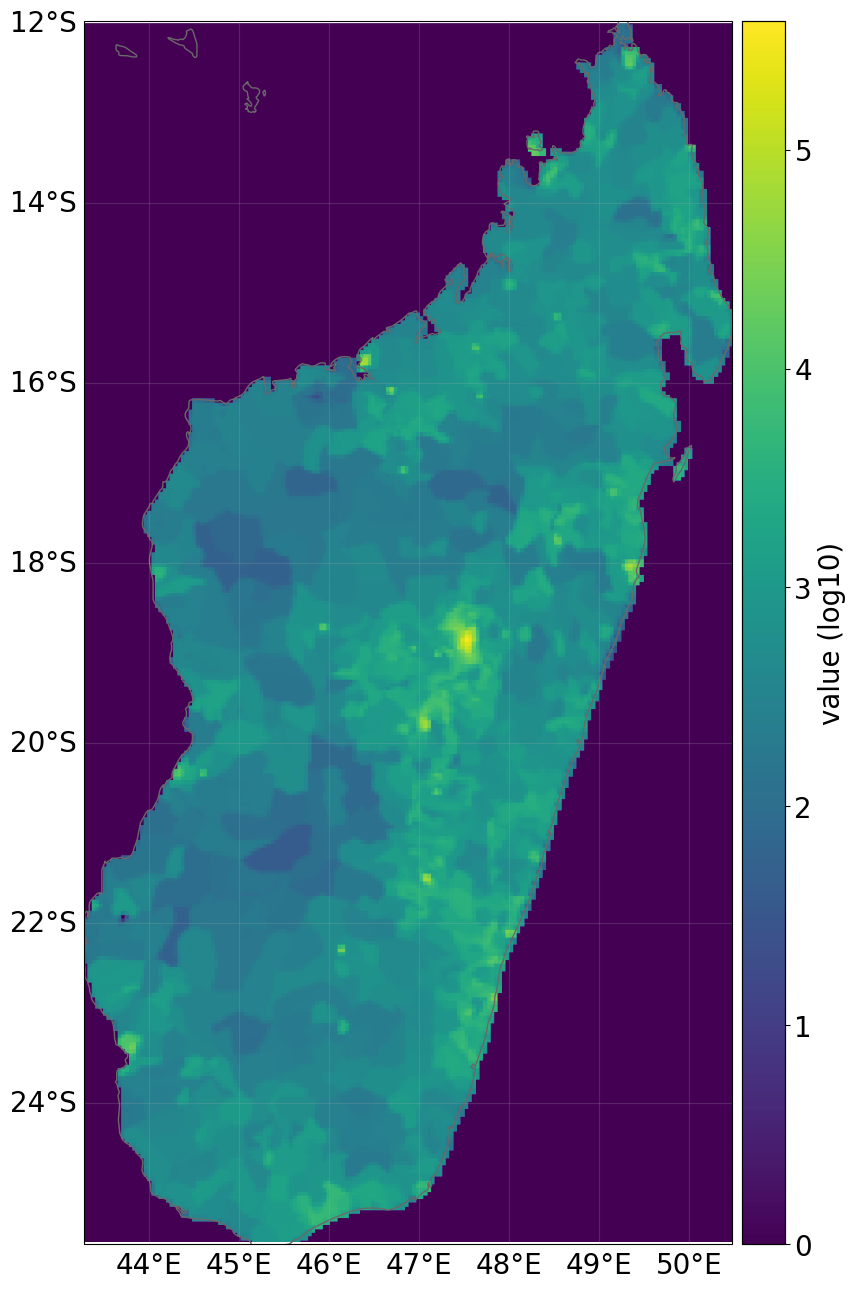

In [53]:
# Solution
MDG_Pop = client.get_exposures('litpop', properties={'country_iso3alpha':'MDG', 'exponents': '(0,1)', 'version': 'v2'})
MDG_Pop.plot_raster()

Create an impact function to estimate how many people are affected by winds over 40 m/s. 

In [54]:
# Impact function
import numpy as np
from climada.entity import ImpactFunc, ImpactFuncSet

impf = ImpactFunc()
impf.id = 1
impf.name = 'TC_step'
impf.intensity_unit = 'm/s'
impf.haz_type = 'TC'
impf.intensity = np.arange(0, 100) # intensity range over which the ImpF is defined
impf.paa = np.ones(100)

Define MDD (`impf.mdd`) by implementing a function which yields 0 for wind intensities up to 40 m/s and 1 for wind intensities above 40 m/s.

Hint: To create a np.array containing 0 you can use `np.zeros()`.

In [55]:
# Your code comes here
def mdd_func(intensity):
    if intensity < 40:
        return 0
    else:
        return 1

impf.mdd = np.zeros_like(impf.intensity)
for i in range(len(impf.intensity)):
    impf.mdd[i] = mdd_func(impf.intensity[i])

Add the impact function you created above to an impact function set container and plot it: 

<AxesSubplot:title={'center':'TC 1: TC_step'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

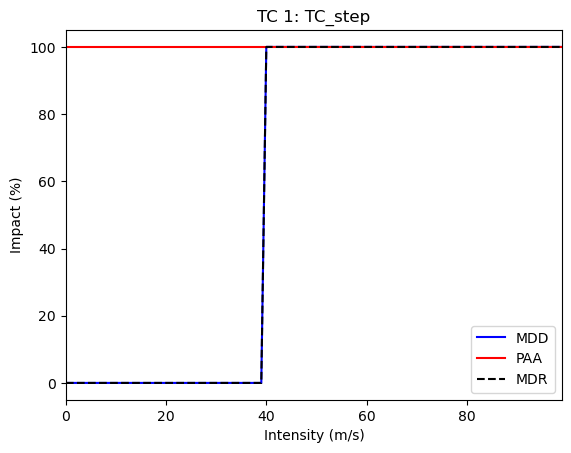

In [56]:
impact_funcs = ImpactFuncSet()
impact_funcs.append(impf)
impact_funcs.plot()

Compute the impact of TCs on people in Madagaskar. Use the probabilistic hazard, exposure and impact function set created above. 

Hint: It is optional to store the exposure and impact function set in an entity container as we did in the first example. Alternatively, you can directly give the two components to the function calculating the impact. 

In [57]:
# Your code comes here
imp_pop = ImpactCalc(MDG_Pop, impact_funcs, tc_SI_proba).impact()

**7. a)** Use the calculated impact to answer the following question: How many people in Madagascar are on average affected by winds above 40 m/s per year? 

Hint: Use the probabilistic hazard set for a more robust estimate.

In [58]:
# Your code comes here
people_affected = imp_pop.aai_agg
# Print the result
print("On average {:.0f} people in Madagascar are affected by strong winds annually.".format(people_affected))

On average 616915 people in Madagascar are affected by strong winds annually.


<font size="5"> **CLIMADA EXERCISE 3** to the lecture<br>
<font size="4"> Climate Change Uncertainty and Risk: from Probabilistic Forecasts to Economics of Climate Adaptation</font>

**Prof. Reto Knutti and Prof. David Bresch** <br>
Spring Term 2024<br>
<br>
**Tutors**<br>
Donghe Zhu (donghe.zhu@env.ethz.ch)<br>
Gergana Gyuleva (gergana.gyuleva@env.ethz.ch)<br>
Timo Schmid (timo.schmid@usys.ethz.ch)<br>
Sarah Hülsen (sarah.huelsen@usys.ethz.ch)<br>

All relevant course information to be found here:<br>
http://www.iac.ethz.ch/edu/courses/master/modules/climate-risk.html<br>
Everything for CLIMADA (tutorials, code) can be downloaded from GitHub:<br>
https://github.com/CLIMADA-project/climada_python

<font size="5"> **8. Climate Change Scenarios** </font>

For this exercise we will download tropical cyclone hazard data for RCP8.5 with reference year 2040 from the API. <br> Hint: Think back to how you did this for historical and probabilistic hazard data in Exercise 1 and think about which dataset properties you need to change.

In [59]:
# your code goes here
from climada.util.api_client import Client
client = Client()
hazard_type = 'tropical_cyclone'
properties = {
    'country_iso3alpha': 'MDG',
    'climate_scenario': 'rcp85',
    'ref_year': '2040',
    'event_type': 'synthetic'  
}
tc_MDG_proba_rcp85_2040 = client.get_hazard(hazard_type=hazard_type, properties=properties)

https://climada.ethz.ch/data-api/v1/dataset	climate_scenario=rcp85	country_iso3alpha=MDG	data_type=tropical_cyclone	event_type=synthetic	limit=100000	name=None	ref_year=2040	status=active	version=None


In case of no RCP datasets being available, one could implement more generic climate change scenarios in the CLIMADA model by modifying the wind frequency and/or the wind speed (hazard intensity) of a hazard set. For example, we can increase the frequency (*f_screw*) by 10% and the intensity (*i_screw*) by 3% for all TCs.<br>
Note, that the climate change screws contain the new total percentage and not only the changes. For example a 3% increase in wind speed is made by i_screw = 1.03 (and not only 0.03).<br>

To create a hazard set with a climate change scenario based on this exercises' hazard set you could use the routine defined in the following code:

```python
import copy as cp
def hazard_climate_scenario(haz_in,
                            f_screw,
                            i_screw):
    haz_out = cp.deepcopy(haz_in)
    haz_out.frequency = haz_out.frequency * f_screw
    haz_out.intensity = haz_out.intensity * i_screw
    return haz_out

```

**8.a)** How big is the AAI and how does it compare to the previous estimates without climate change?

In [60]:
# start by loading the required climada modules, your saved probabilistic hazard file as well as everything you need
# to calculate impacts (entity container with exposure and impact functions as used in Ex 2)
# Quickly plot everything to check if it's loaded correctly

# your code goes here

# Entity
from climada.entity import Entity

ent_MDG = Entity()
MDG_LitPop = client.get_exposures('litpop', properties={'country_iso3alpha':'MDG', 'exponents': '(1,1)', 'version': 'v2'})
ent_MDG.exposures = MDG_LitPop
ent_MDG.check()


# Impact function
import numpy as np
from climada.entity import ImpactFunc, ImpactFuncSet

ImpF = ImpactFunc()
ImpF.id = 1
ImpF.name = 'Emanuel'
ImpF.intensity_unit = 'm/s'
ImpF.haz_type = 'TC'
ImpF.intensity = np.arange(0, 121, 5) # Intensity range over which the ImpF is defined
# tc_MDG_proba_rcp85_2040.plot_intensity(0)
ImpF.paa = np.ones_like(ImpF.intensity)
v_half = 46.8
v_thresh = 25.7
v = ImpF.intensity
vn = np.maximum((v-v_thresh),0)/(v_half-v_thresh)
ImpF.mdd = vn**3/(1+vn**3)

ent_MDG.impact_funcs = ImpactFuncSet()
ent_MDG.impact_funcs.append(ImpF)
# ent_MDG.impact_funcs.plot()

# calculate the impact with the probabilistic storm set for RCP 8.5
from climada.engine import ImpactCalc
imp_MDG_proba_rcp85_2040 = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_MDG_proba_rcp85_2040).impact()
print("The probablistic AAI is %.2f $." %(np.sum(imp_MDG_proba_rcp85_2040.at_event * imp_MDG_proba_rcp85_2040.frequency)))

https://climada.ethz.ch/data-api/v1/dataset	country_iso3alpha=MDG	data_type=litpop	exponents=(1,1)	limit=100000	name=None	status=active	version=v2
The probablistic AAI is 344029210.79 $.


The AAI for the RCP8.5 scenario is 344mio dollars of damages, compared to the 318 mio dollars with no climate scenario. This is not a major increase in damage despite a rather large increase in climate unpredictability.

**8.b)** How does the expected impact with a 50 year return period compare to estimates without climate change? <br> Hint: It is advisable to plot both exceedance frequency curves in one plot, since that makes it easier to see differences.

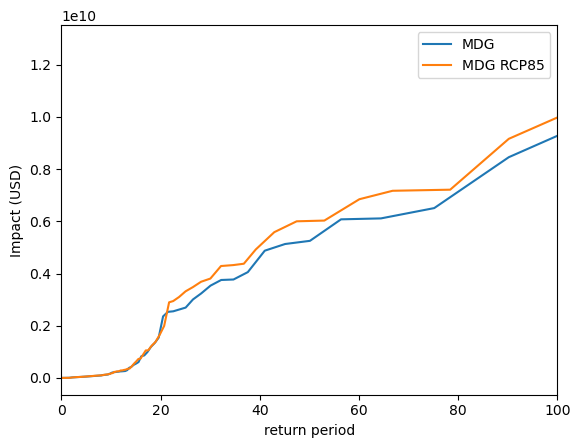

In [61]:
# your code goes here
import matplotlib.pyplot as plt

# no scenario data
from climada.hazard import TropCyclone
file_name_haz_proba = './data/tc_SI_proba.hdf5' # make sure to adjust the path to your probabilistic dataset
tc_MDG_proba = TropCyclone.from_hdf5(file_name_haz_proba)
# tc_SI_proba.plot_intensity(0) # check that it's loaded correctly
imp_MDG_proba = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_MDG_proba).impact()

freq_curve_MDG = imp_MDG_proba.calc_freq_curve()
freq_curve_MDG_rcp85 = imp_MDG_proba_rcp85_2040.calc_freq_curve()
# print(type(freq_curve_MDG))
# help(freq_curve_MDG)

freq_curve_MDGy = freq_curve_MDG.impact
freq_curve_MDG_rcp85y = freq_curve_MDG_rcp85.impact
freq_curve_MDGx = freq_curve_MDG.return_per
freq_curve_MDG_rcp85x = freq_curve_MDG_rcp85.return_per

plt.plot(freq_curve_MDGx, freq_curve_MDGy, label='MDG')
plt.plot(freq_curve_MDG_rcp85x, freq_curve_MDG_rcp85y, label='MDG RCP85')
# Add labels and legend
plt.xlabel('return period')
plt.ylabel('Impact (USD)')
plt.xlim(0, 100)
plt.legend()
plt.show()

*For a return period of 50 years, the difference is quite substantial, as the difference is in the order of 10 to 20% (5 billion to 6 billion USD impact increase) This difference of about 1 billion USD stays the same throughout the years, however.*

<font size="5"> **9. Economic Growth and Total Climate Risk**</font>

To beneﬁt from the following tasks, please make sure that you’re familiar with the computations of climate scenarios and risk transfer within the CLIMADA environment.
To account for the total risk in our calculations, we have to consider the economic growth in the assets as well; in addition to the expected climate changes expressed in the climate scenarios.

Remember: **total climate risk = risk today + risk due to economic growth + risk due to climate change**.

In order to construct the 2040 asset base to reﬂect the economic growth, we suggest the following approach:
1. (if needed: reload or construct the exposure entity for Madagascar)
2. Create the exposure entity for 2040 by copying the present expsoure entity and applying a 2% growth rate on the asset values:
    - `deepcopy` ent_MDG and name it ent_MDG_2040
    - note: even though we assume 2020 as reference year, LitPop's most recent data might be a few years old. Thus check what the true reference year of the dataset is: `print(ent_MDG.exposures.ref_year)`
    - progagate the 2% growth rate from the reference year to 2040: $assets_{2040} = assets_{ref_{-}year} * 1.02^ {2040-ref_{-}year}$ 

Reload or construct exposure entity for Madagascar today:

What reference year does LitPop data feature for Madagascar?

In [62]:
# your code comes here
print(MDG_LitPop.ref_year)

2018


construct economic growth rate factor:

In [63]:
# your code comes here
growth_rate_factor = 1.02**(2040-MDG_LitPop.ref_year)
print(growth_rate_factor)

1.5459796707758804


Deepcopy exposure today and multiply with the economic growth rate factor:<br>
(Note, for me information on `deepcopy` visit this site: https://docs.python.org/3/library/copy.html)

Hint: you can access the exposure values using `ent_MDG.exposures.gdf.value`

In [64]:
# your code comes here
import copy
ent_MDG_2040 = copy.deepcopy(ent_MDG)
ent_MDG_2040.exposures.gdf.value *= growth_rate_factor

Note, we needed to manually adjust ref_year in the exposure data set `ent_MDG_2040` because it copies everything from `ent_MDG`.

In [65]:
ent_MDG_2040.exposures.ref_year = 2040

Now you could analyse these 2040 assets with both the present-day and the climate change scenario hazard event sets within CLIMADA and note the average annual impact (AAI). You could use `ImpactCalc.impact()` with the appropriate inputs resulting in impacts of for 2040 with and without climate change and make a comparison yourself.

Luckily CLIMADA does this calculation for you. You can plot a "waterfall" graph as on slides "The cost of adaptation" - section: "Impact calculation - Florida case study" of the lecture notes with the following command:

<AxesSubplot:title={'center':'Risk at 2018 and 2040'}, ylabel='Impact (USD m)'>

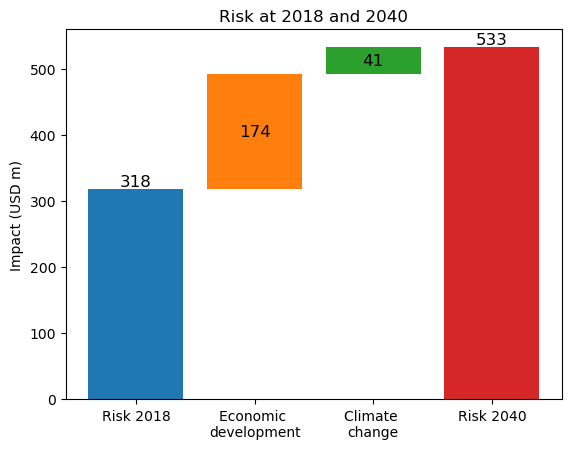

In [66]:
from climada.engine import CostBenefit
cost_ben = CostBenefit()
cost_ben.plot_waterfall(tc_MDG_proba, ent_MDG, tc_MDG_proba_rcp85_2040, ent_MDG_2040)

9.a) Discuss the waterfall plot. Which risk contributes most to the climate risk in 2040? 

Looking at the waterfall plot, it is evident that economic development is the bigger contributor to the increase in risk in 2040 from 2018. However, the risk in 2018 still is the biggest contributor/predictor to what risk will be in 2040.

<font size="5"> **10. Adaptation Measures**</font>

The goal in this section is to implement an adaptation measure.

As an example of an adaptation measure, implement "elevate existing buildings". See the tab `measures` in the entity Excel ﬁle for today's assets. Determine the present value of the cost for this measure (cell C2). Note that the cost is the present value (PV) of all the costs related to this measure over the next 20 years, hence use tab measures_details and discounting_sheet to determine these.

Parameterise the impact of this measure (tab `measures`), e.g. adjust which impact function should be used in the column "damagefunctions map" (hint: cell L5). The damagefunctions map column works with the format "impfID_oldtoImpfID_new" (hint: check the `impact_functions` tab). Save your implemented changes under a comprehensive new name and read it in again with

In [67]:
data_dir = 'IAC_lectures/2024_FS/CCUR/Groupwork/2_CLIMADA'
#file_name_eb = (data_dir.joinpath('entity_exercise_LitPop_adapt.xlsx'))
ent_MDG_now_eb = Entity.from_excel('./data/entity_exercise_LitPop_adapt.xlsx')
ent_MDG_now_eb.exposures = ent_MDG.exposures
ent_MDG_now_eb.impact_funcs.check()
ent_MDG_now_eb.exposures.ref_year = 2018
ent_MDG_now_eb.check()

This new entity ﬁle should now include the newly defined measure "elevate existing buildings". Now run the following code, to select the measure and apply it to your impact calculations:

In [68]:
meas_eb = ent_MDG_now_eb.measures.get_measure(name='elevate existing buildings')[0]
imp_MDG_now_eb = meas_eb.calc_impact(ent_MDG_now_eb.exposures,
                                     ent_MDG_now_eb.impact_funcs,
                                     tc_MDG_proba)[0]

`imp_MDG_now_eb` is an object with the properties of the `impact` class, which means that it contains the same functionalities as i.e. `imp_MDG`with which we worked already.

10.a) Now calculate the effect of elevating existing buildings on the average annual impact (AAI).

In [69]:
# your code comes here
print("The probablistic AAI is %.2f $." %(np.sum(imp_MDG_now_eb.at_event * imp_MDG_now_eb.frequency)))

The probablistic AAI is 194444319.07 $.


10.b) What does the annual expected average cost (prevention) / annual benefit (averted impact) ratio look like? How did you calculate it? Is the measure cost effective? Would you implement this measure, explain your decision? (3-5 sentences)


In [70]:
# your code comes here

# previous cost
imp_MDG_proba = ImpactCalc(ent_MDG.exposures, ent_MDG.impact_funcs, tc_MDG_proba).impact()
annual_benefit = (np.sum(imp_MDG_proba.at_event * imp_MDG_proba.frequency))-(np.sum(imp_MDG_now_eb.at_event * imp_MDG_now_eb.frequency))
print("The annual benefit is %.2f $." %(annual_benefit))
prevention_cost = 1382951437 #excel
ratio = annual_benefit/prevention_cost
print("The ratio between benefit and cost is %.2f ." %(ratio))

The annual benefit is 123538971.56 $.
The ratio between benefit and cost is 0.09 .


*Given the huge cost of elevating buildings, there is virtually no benefit compared to the cost.*

To finish things off, we complement this adaptation measure with a risk transfer measure. Instead of calculating the effect on the impacts ourself, we use the elegant way to represent a risk transfer element in the tab measures of the entity Excel ﬁle. As a deductible (attachment), you might use 5 billion USD (cell O6) and as a cover, 9 billion USD (P6) - (same values as in Exercise 2) or look up an adequate cover on the impact exceedance frequency curve (you remember: `calc_freq_curve()`). As for the costs, assume 100 mn. $. Save your implemented changes under a comprehensive new name.

In [71]:
# your code comes here
# create ent_MDG_now_eb_rt as well as ent_MDG_2040_eb_rt
ent_MDG_now_eb_rt = Entity.from_excel('./data/entity_exercise_LitPop_adapt.xlsx')
ent_MDG_now_eb_rt.exposures = ent_MDG.exposures
ent_MDG_now_eb_rt.impact_funcs.check()
ent_MDG_now_eb_rt.exposures.ref_year = 2018
ent_MDG_now_eb_rt.check()

ent_MDG_2040_eb_rt = Entity.from_excel('./data/entity_exercise_LitPop_adapt.xlsx')
ent_MDG_2040_eb_rt.exposures = copy.deepcopy(ent_MDG.exposures)
ent_MDG_2040_eb_rt.exposures.gdf.value *= growth_rate_factor
ent_MDG_2040_eb_rt.impact_funcs.check()
ent_MDG_2040_eb_rt.exposures.ref_year = 2040
ent_MDG_2040_eb_rt.check()
# make sure that the ref years are set correctly

After reading in again the updated entity ﬁle (gives you ent_MDG_now_eb_rt) you have everything prepared to calculate the adaptation cost curve for these two measures:

1) assess the effect of these measures for present climate (today) and the method CostBenefit.calc(…) again with the updated entity and your probabilistic hazard event set (resulting in cost_ben_bn_rt).

2) Within the updated `entity`, adjust the exposure to 2040 values so that we can look at impact development over time and cost effectiveness of the measures at the same time.

3) Run the following code to show the waterfall graph with total risk from now to 2040 including the effect of the measures:


Measure                                              Cost (USD bn)    Benefit (USD bn)    Benefit/Cost
-------------------------------------------------  ---------------  ------------------  --------------
vegetation management (e.g. mangrove restoration)        0.0720448             2.24838       31.2081
elevate existing buildings                               1.38295               2.8417         2.05481
risk transfer                                            2.4007                2.3007         0.958345

--------------------  --------  --------
Total climate risk:   7.77073   (USD bn)
Average annual risk:  0.531862  (USD bn)
Residual risk:        0.37995   (USD bn)
--------------------  --------  --------
Net Present Values
2018
2040


<AxesSubplot:title={'center':'Total accumulated impact from 2018 to 2040'}, ylabel='Impact (USD m)'>

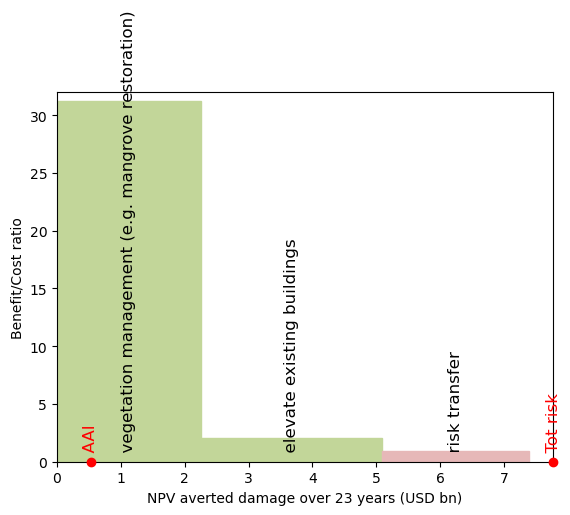

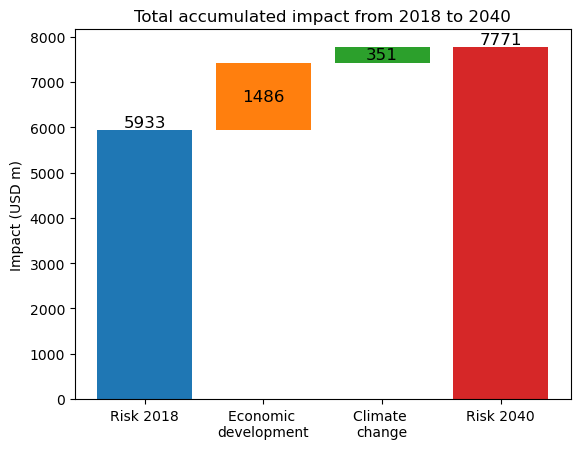

In [72]:
cost_ben_measures_CC = CostBenefit()
cost_ben_measures_CC.calc(tc_MDG_proba, ent_MDG_now_eb_rt,
                          tc_MDG_proba_rcp85_2040, ent_MDG_2040_eb_rt)
cost_ben_measures_CC.plot_cost_benefit()
print(ent_MDG_now_eb_rt.exposures.ref_year)
print(ent_MDG_2040_eb_rt.exposures.ref_year)
cost_ben_measures_CC.plot_waterfall_accumulated(tc_MDG_proba, ent_MDG_now_eb_rt, ent_MDG_2040_eb_rt)

10.c) Discuss your new waterfall graph and the adaptation cost. What options would you recommend for citizens or the government of Madagascar? (each in a few sentences)

The new (accumulated) waterfall plot shows the accumulated risk over the period of 22 years (2018-2040). It can be seen that it is not simply a multiplication of AAI with the period length, which is due to the time dependence of the risk. Given the cost/benefit ratio, vegetation management is the best practice to mitigate climate risks. However, this can only mitigate about a third of all the damage. While elevating buildings does not have as high of a cost-benefit ratio as vegetation management, paired together with they can mitigate more than half of the damage. It is unfortunatly crutial to take into account the fact that the GDP of Madagascar is about 9bn, a cost of around 1bn to elevate buildings amounts to about 10% of the GDP, which is unthinkable for a country to implement. Therefore, I would recommend prioritising using vegetation management, and consider elevating building for areas with higher levels of income, if the ressources allow for it.
